<a href="https://colab.research.google.com/github/Aryayayayaa/ScaleScan-Fish-Classifier/blob/main/MultiClass_Fish_Img_Classifn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: ScaleScan: Fish Classifier App**

# **Problem Statement:**

This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images.

# **Project Summary:**

The **ScaleScan: Fish Classifier App** project focuses on developing a robust image classification system capable of identifying various fish species. This end-to-end project encompasses data preparation, model training using both custom and state-of-the-art deep learning architectures, comprehensive evaluation, and deployment as an interactive web application.

---

### **Data Preparation and Analysis**

The project began by setting up the data environment, connecting to Google Drive to access the fish image dataset, which is organized into distinct classes. Images were standardized to a size of **224x224 pixels** and processed in **batches of 128**.

A key step involved using **`ImageDataGenerator`** for efficient data loading and on-the-fly preprocessing. This included **rescaling pixel values to a [0, 1] range** for all datasets (training, validation, and test). For the training data, extensive **data augmentation techniques** such as rotation, width/height shifts, shear, zoom, and horizontal flipping were applied. This significantly enhances the model's ability to generalize by exposing it to a wider variety of image variations.

Thorough **dataset analysis** was conducted to understand the data distribution. This involved:
* Visualizing **class distribution** (number of images per class) for training, validation, and test sets to identify any imbalances.
* Displaying **sample images** from each class to get a visual understanding of the data.
* Analyzing **pixel intensity distribution** across the datasets to ensure consistent preprocessing.
* Checking **original image resolution consistency** to understand the raw image characteristics before resizing.

---

### **Model Training**

The core of the project involved training and fine-tuning deep learning models for fish classification. The approach included:

1.  **Training a Convolutional Neural Network (CNN) from Scratch:** A custom CNN architecture was designed and trained as a baseline, providing a fundamental understanding of how a basic model performs on the dataset.
2.  **Experimentation with Pre-trained Models:** Five widely-used pre-trained models were leveraged for transfer learning: **VGG16, ResNet50, MobileNet, InceptionV3, and EfficientNetB0**. These models, pre-trained on the vast ImageNet dataset, provide powerful feature extraction capabilities.
    * **Initial Training (Head Only):** For each pre-trained model, their convolutional base layers were initially frozen, and a new classification head (dense layers) was trained for a few epochs (set to 5) on the fish dataset.
    * **Fine-tuning:** After the initial training, the base model's layers were unfrozen, and the entire network was fine-tuned with a very low learning rate for additional epochs (set to 10). This allowed the pre-trained features to adapt specifically to the nuances of the fish images.
    * **Optimization for Speed:** To manage training time, the number of epochs for both initial training and fine-tuning was set to a lower yet effective range, and **`EarlyStopping` with a patience of 3** was implemented. This callback intelligently halts training when validation loss stops improving, preventing overfitting and saving computational resources.

---

### **Model Evaluation**

A rigorous **model evaluation** process was performed to compare the performance of all trained models:

* **Metric Comparison:** For each model (the scratch CNN and all fine-tuned pre-trained models), key classification metrics were calculated on the test dataset: **accuracy, precision, recall, and F1-score**. These metrics were then visually compared using bar charts to highlight the strengths and weaknesses of each architecture.
* **Confusion Matrices:** Detailed **confusion matrices** were generated for each model, providing insights into class-specific performance and identifying which fish species were most frequently misclassified.
* **Training History Visualization:** Plots of training and validation accuracy and loss over epochs were generated for each model, offering a visual understanding of their learning curves and convergence behavior.
* **Best Model Identification:** Based on the evaluation results, the model achieving the **highest test accuracy** was identified as the overall best performer, with its specific accuracy reported.

---

### **Deployment: Streamlit Application**

The culmination of the project is the **ScaleScan: Fish Classifier App**, built using Streamlit, providing an intuitive user interface for real-world application:

* **Image Upload:** Users can easily upload their own fish images for classification.
* **Prediction and Confidence:** The app predicts the fish category and displays the **top 3 most confident predictions** along with their respective confidence scores.
* **Visual Enhancements:** The application features a **custom background image** for an enhanced visual experience and includes a **loading indicator** to inform users during image processing.
* **User Feedback Mechanism:** A simple "Was this prediction correct?" feature allows users to provide feedback, which is logged to a text file. This mechanism is invaluable for continuous model improvement and data collection.

The **ScaleScan: Fish Classifier App** provides a practical and interactive solution for fish species identification, demonstrating a complete machine learning workflow from data to deployment.

# **GitHub Link:**

# **Code:**

In [1]:
# @title Importing Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping                                             # for model saving and early stopping
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0                 # pre-trained models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score      # for evaluation metrics
import seaborn as sns
import os
from google.colab import drive
from PIL import Image                                                                                             # for checking original image resolutions
from collections import Counter                                                                                   # for class distribution analysis
import pandas as pd                                                                                               # for easier plotting of comparison metrics

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# @title Google Drive Steps

drive.mount('/content/drive')

BASE_DATA_DIR = '/content/drive/My Drive/Multiclass Fish Img Classifn/images dataset/data'

TRAIN_DIR = os.path.join(BASE_DATA_DIR, 'train')
VALID_DIR = os.path.join(BASE_DATA_DIR, 'val')
TEST_DIR = os.path.join(BASE_DATA_DIR, 'test')

# Define target image size and batch size for model input
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Define the classes based on your folder names
CLASSES = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream','fish sea_food hourse_mackerel','fish sea_food red_mullet','fish sea_food red_sea_bream','fish sea_food sea_bass',\
           'fish sea_food shrimp','fish sea_food striped_red_mullet','fish sea_food trout']
NUM_CLASSES = len(CLASSES)

print(TRAIN_DIR)
print(VALID_DIR)
print(TEST_DIR)

print(f"Dataset root directory: {BASE_DATA_DIR}")
print(f"Image dimensions for processing: {IMG_HEIGHT}x{IMG_WIDTH}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Classes: {CLASSES}")

Mounted at /content/drive
/content/drive/My Drive/Multiclass Fish Img Classifn/images dataset/data/train
/content/drive/My Drive/Multiclass Fish Img Classifn/images dataset/data/val
/content/drive/My Drive/Multiclass Fish Img Classifn/images dataset/data/test
Dataset root directory: /content/drive/My Drive/Multiclass Fish Img Classifn/images dataset/data
Image dimensions for processing: 224x224
Batch size: 32
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [3]:
# @title Load Datasets
# Images will be resized upon loading, and pixel values will be rescaled to 0-1 range.

# Initialize ImageDataGenerator for training data with augmentation
print("Initializing Training Data Generator...")
train_datagen = ImageDataGenerator(
    rescale=1./255,                                                             # Normalize pixel values to [0, 1]
    rotation_range=20,                                                          # Random rotation up to 20 degrees
    width_shift_range=0.2,                                                      # Random horizontal shift
    height_shift_range=0.2,                                                     # Random vertical shift
    shear_range=0.2,                                                            # Shear transformation
    zoom_range=0.2,                                                             # Random zoom
    horizontal_flip=True,                                                       # Random horizontal flip
    fill_mode='nearest'                                                         # Strategy for filling in new pixels after transformations
)

# Initialize ImageDataGenerator for validation and test data (only rescaling)
print("Initializing Validation and Test Data Generators...")
valid_test_datagen = ImageDataGenerator(rescale=1./255)                         # Only rescale for validation/test

# Load the training dataset using flow_from_directory
print("Loading Training Dataset...")
train_ds = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),                                        # Images are resized during loading
    batch_size=BATCH_SIZE,
    class_mode='categorical',                                                   # For one-hot encoded labels
    shuffle=True                                                                # Shuffle the training data
)

# Load the validation dataset using flow_from_directory
print("\nLoading Validation Dataset...")
valid_ds = valid_test_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False                                                               # Do not shuffle validation data
)

# Load the test dataset using flow_from_directory
print("\nLoading Test Dataset...")
test_ds = valid_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False                                                               # Do not shuffle test data
)

print("\nAll datasets loaded (train, validation, test) using ImageDataGenerator successfully!")
inferred_class_names = sorted(train_ds.class_indices.keys())
print(f"Inferred Class Names (from training generator): {inferred_class_names}")


Initializing Training Data Generator...
Initializing Validation and Test Data Generators...
Loading Training Dataset...
Found 6225 images belonging to 11 classes.

Loading Validation Dataset...
Found 1092 images belonging to 11 classes.

Loading Test Dataset...
Found 3187 images belonging to 11 classes.

All datasets loaded (train, validation, test) using ImageDataGenerator successfully!
Inferred Class Names (from training generator): ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']



--- Starting Dataset Analysis ---

Analyzing Class Distribution...

Checking class imbalance for Training set:
  animal fish: 1096 images
  animal fish bass: 30 images
  fish sea_food black_sea_sprat: 569 images
  fish sea_food gilt_head_bream: 566 images
  fish sea_food hourse_mackerel: 573 images
  fish sea_food red_mullet: 579 images
  fish sea_food red_sea_bream: 571 images
  fish sea_food sea_bass: 538 images
  fish sea_food shrimp: 576 images
  fish sea_food striped_red_mullet: 547 images
  fish sea_food trout: 580 images


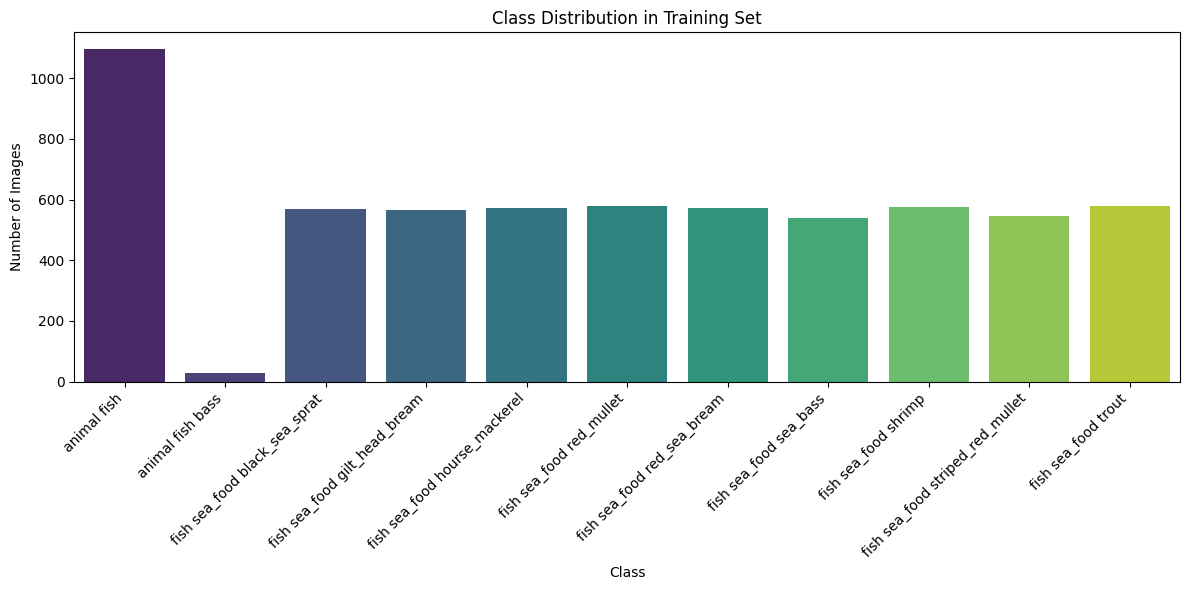


Checking class imbalance for Validation set:
  animal fish: 187 images
  animal fish bass: 10 images
  fish sea_food black_sea_sprat: 105 images
  fish sea_food gilt_head_bream: 94 images
  fish sea_food hourse_mackerel: 97 images
  fish sea_food red_mullet: 90 images
  fish sea_food red_sea_bream: 113 images
  fish sea_food sea_bass: 97 images
  fish sea_food shrimp: 100 images
  fish sea_food striped_red_mullet: 101 images
  fish sea_food trout: 98 images


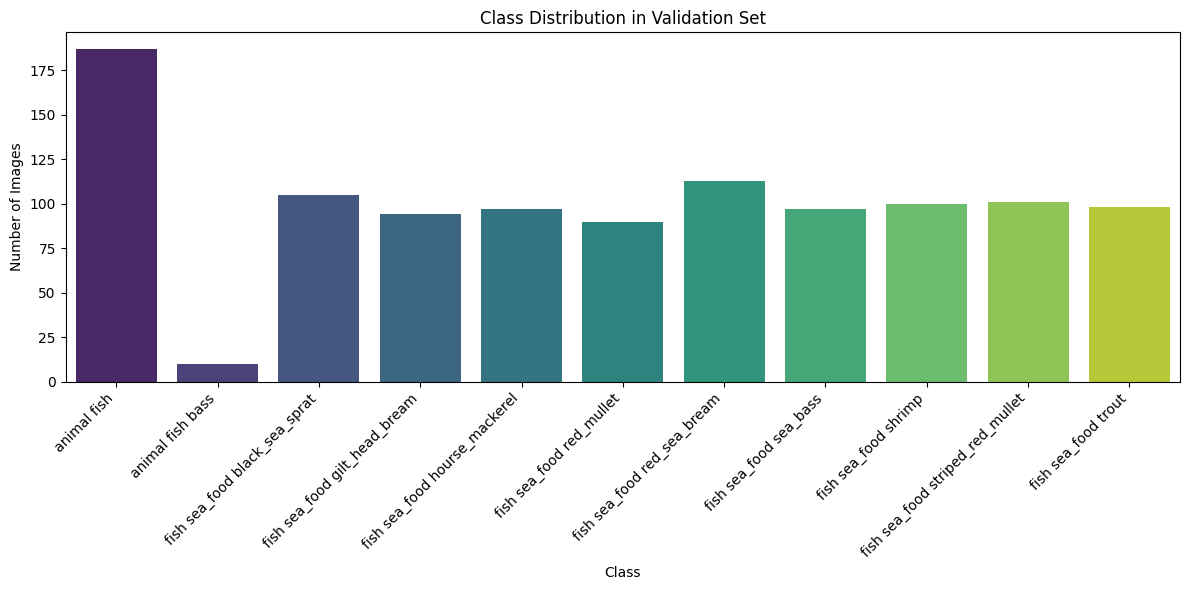


Checking class imbalance for Test set:
  animal fish: 520 images
  animal fish bass: 13 images
  fish sea_food black_sea_sprat: 298 images
  fish sea_food gilt_head_bream: 305 images
  fish sea_food hourse_mackerel: 286 images
  fish sea_food red_mullet: 291 images
  fish sea_food red_sea_bream: 273 images
  fish sea_food sea_bass: 327 images
  fish sea_food shrimp: 289 images
  fish sea_food striped_red_mullet: 293 images
  fish sea_food trout: 292 images


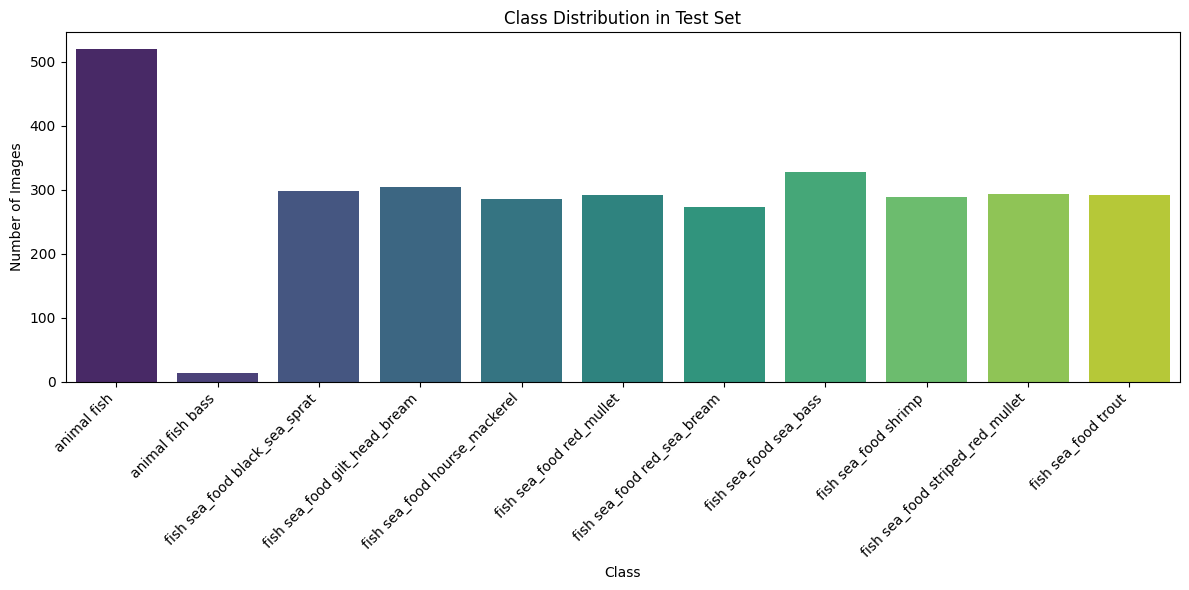


Visualizing Sample Images per Class...


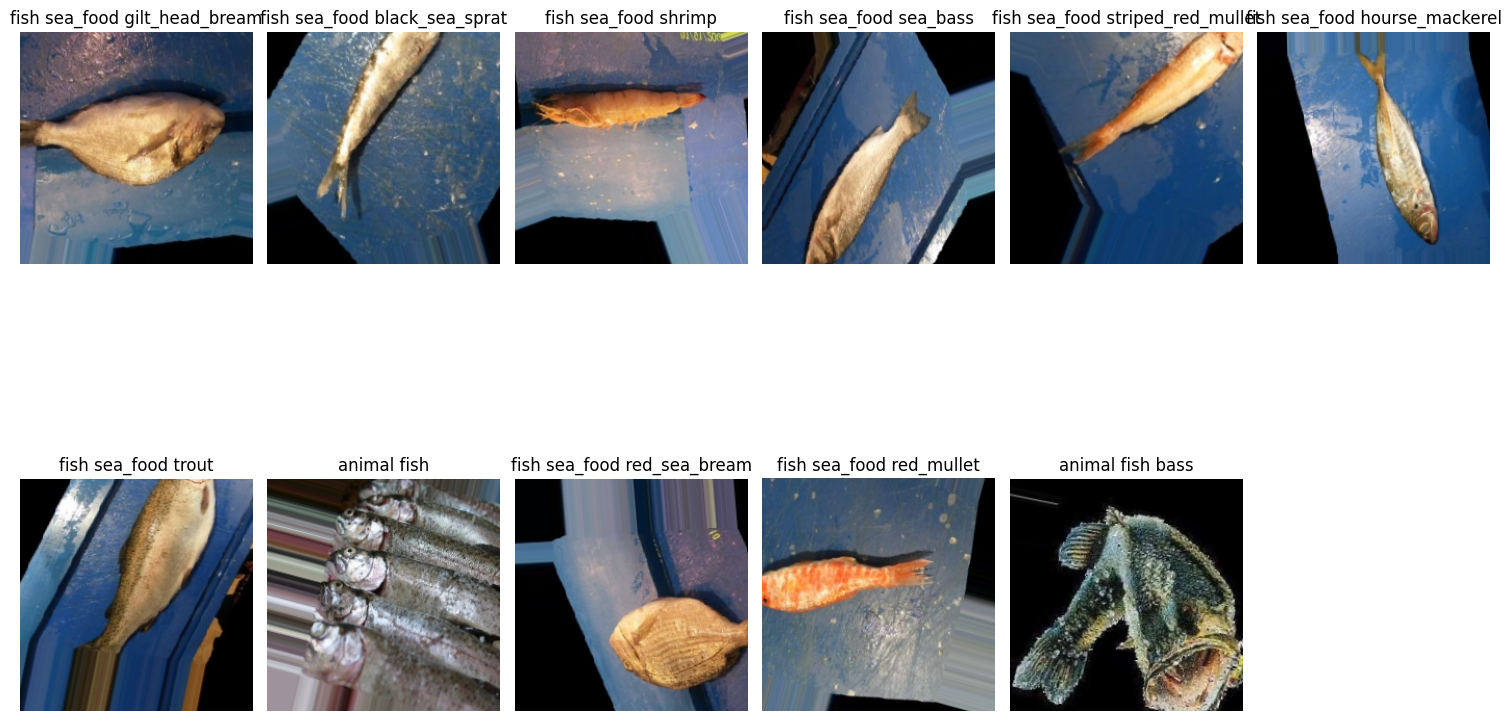


Analyzing Pixel Intensity Distribution...


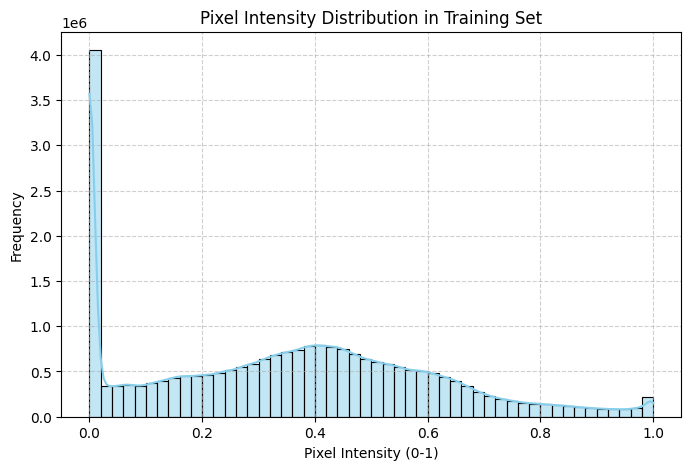

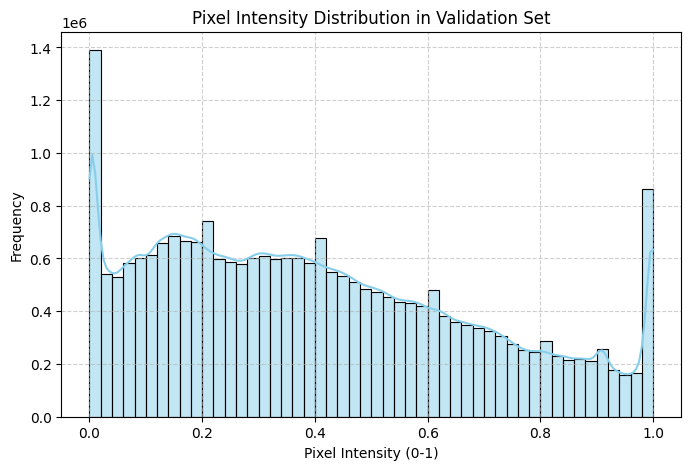

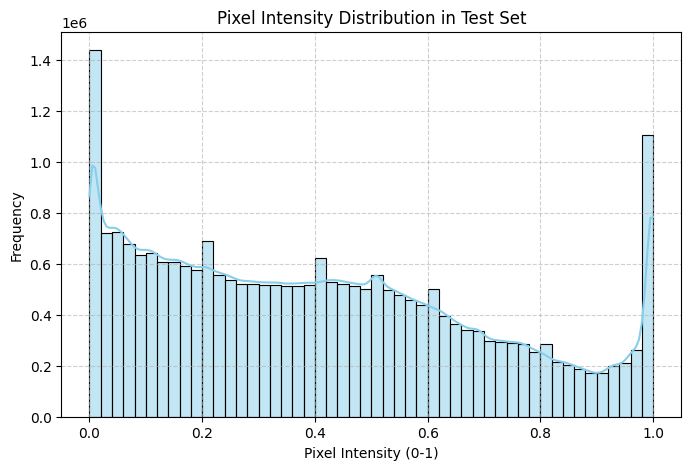


Checking Original Image Resolution Consistency for Training Set...
  All 6225 images in Training set have a consistent original resolution: (256, 256)
  Total image files checked in Training set: 6225

Checking Original Image Resolution Consistency for Validation Set...
  All 1092 images in Validation set have a consistent original resolution: (256, 256)
  Total image files checked in Validation set: 1092

Checking Original Image Resolution Consistency for Test Set...
  All 3187 images in Test set have a consistent original resolution: (256, 256)
  Total image files checked in Test set: 3187

--- Dataset Analysis Complete ---


In [4]:
# @title Dataset Analysis

print("\n--- Starting Dataset Analysis ---")

# 1. Class Distribution
print("\nAnalyzing Class Distribution...")

def plot_class_distribution(generator, title):
    #Plots the class distribution for a given DirectoryIterator and prints imbalance
    # Get integer labels for all samples
    integer_labels = generator.labels
    class_indices = generator.class_indices
    idx_to_class = {v: k for k, v in class_indices.items()}

    class_labels = [idx_to_class[idx] for idx in integer_labels]
    class_counts = Counter(class_labels)
    sorted_classes = sorted(class_counts.items())                               # Sort by class name for consistent plotting

    labels = [item[0] for item in sorted_classes]
    counts = [item[1] for item in sorted_classes]

    print(f"\nChecking class imbalance for {title} set:")
    for label, count in sorted_classes:
        print(f"  {label}: {count} images")

    plt.figure(figsize=(12, 6))
    sns.barplot(x=labels, y=counts, hue=labels, palette='viridis', legend=False)
    plt.title(f'Class Distribution in {title} Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for training set and print imbalance
plot_class_distribution(train_ds, 'Training')

# Plot for validation set and print imbalance
plot_class_distribution(valid_ds, 'Validation')

# Plot for test set and print imbalance
plot_class_distribution(test_ds, 'Test')



# 2. Visualize Sample Images per Class
print("\nVisualizing Sample Images per Class...")

# Create a dictionary to store one image per class
sample_images_per_class = {}

# Reset the generator to ensure we start from the beginning for sampling
train_ds.reset()

# Iterate through batches until all classes have a sample or a reasonable number of batches are processed
# Use len(train_ds) to get the total number of batches
max_batches_to_sample = len(train_ds)
for i in range(max_batches_to_sample):
    images, labels = next(train_ds) # Corrected: use next()
    for j in range(len(images)):
        img = images[j]
        label_idx = np.argmax(labels[j])
        class_name = inferred_class_names[label_idx]
        if class_name not in sample_images_per_class:
            sample_images_per_class[class_name] = img
        if len(sample_images_per_class) == NUM_CLASSES:
            break # Stop if we have at least one sample for each class
    if len(sample_images_per_class) == NUM_CLASSES:
        break # Stop outer loop as well

plt.figure(figsize=(15, 10))
for i, (class_name, img) in enumerate(sample_images_per_class.items()):
    plt.subplot(2, (NUM_CLASSES + 1) // 2, i + 1)                               # Adjust subplot grid dynamically
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()



# 3. Pixel Intensity Distribution
print("\nAnalyzing Pixel Intensity Distribution...")

def plot_pixel_intensity_distribution(generator, title, num_batches_to_sample=5):
    #Plots the pixel intensity distribution for a given DirectoryIterator
    all_pixels = []

    # Reset the generator to ensure consistent sampling
    generator.reset()

    # Iterate through a few batches to collect pixel data
    for i in range(min(num_batches_to_sample, len(generator))):
        images, _ = next(generator)

        # Flatten images and extend the list
        all_pixels.extend(images.flatten())

    plt.figure(figsize=(8, 5))
    sns.histplot(all_pixels, bins=50, kde=True, color='skyblue')
    plt.title(f'Pixel Intensity Distribution in {title} Set')
    plt.xlabel('Pixel Intensity (0-1)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plot for training set
plot_pixel_intensity_distribution(train_ds, 'Training')

# Plot for validation set
plot_pixel_intensity_distribution(valid_ds, 'Validation')

# Plot for test set
plot_pixel_intensity_distribution(test_ds, 'Test')



# 4. Checking Original Image Resolution Consistency
def check_original_image_resolutions(directory_path, title):
    print(f"\nChecking Original Image Resolution Consistency for {title} Set...")
    resolutions = set()
    image_files_checked = 0

    # Walk through the directory to find image files
    for root, _, files in os.walk(directory_path):
        for file in files:

            # Check for common image file extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        resolutions.add(img.size)                               # img.size returns (width, height)
                    image_files_checked += 1
                except Exception as e:
                    print(f"  Could not open image {img_path}: {e}")

    if not resolutions:
        print(f"  No images found or could be processed in {title} set at '{directory_path}'.")
    elif len(resolutions) == 1:
        print(f"  All {image_files_checked} images in {title} set have a consistent original resolution: {resolutions.pop()}")
    else:
        print(f"  Images in {title} set have varying original resolutions. Found {len(resolutions)} unique resolutions:")
        for res in sorted(list(resolutions)):
            print(f"    {res}")
    print(f"  Total image files checked in {title} set: {image_files_checked}")

# Check original image resolutions for each dataset
check_original_image_resolutions(TRAIN_DIR, 'Training')
check_original_image_resolutions(VALID_DIR, 'Validation')
check_original_image_resolutions(TEST_DIR, 'Test')


print("\n--- Dataset Analysis Complete ---")

In [5]:
# @title Data Preprocessing and Augmentation

print("--- Data Preprocessing and Augmentation ---\n")
print("These steps are handled by the ImageDataGenerator instances defined in the 'Load Datasets' section.")
print("\n1. Rescaling Images:")
print("   - All images (training, validation, and test) are rescaled to the [0, 1] range by dividing pixel values by 255.")
print("   - This is applied via `rescale=1./255` in both `train_datagen` and `valid_test_datagen`.")

print("\n2. Data Augmentation (applied to Training Data only):")
print("   - Rotation:        `rotation_range=20` (randomly rotates images by up to 20 degrees).")
print("   - Width Shift:     `width_shift_range=0.2` (randomly shifts images horizontally by up to 20% of the total width).")
print("   - Height Shift:    `height_shift_range=0.2` (randomly shifts images vertically by up to 20% of the total height).")
print("   - Shear:           `shear_range=0.2` (applies random shearing transformations).")
print("   - Zoom:            `zoom_range=0.2` (randomly zooms into images).")
print("   - Horizontal Flip: `horizontal_flip=True` (randomly flips images horizontally).")
print("   - Fill Mode:       `fill_mode='nearest'` (strategy for filling in new pixels after transformations).")
print("\nThese augmentations help the model learn more robust features and improve generalization by exposing it to a wider variety of image variations during training.")

print("\n\n--- Data Preprocessing and Augmentation Complete ---")


--- Data Preprocessing and Augmentation ---

These steps are handled by the ImageDataGenerator instances defined in the 'Load Datasets' section.

1. Rescaling Images:
   - All images (training, validation, and test) are rescaled to the [0, 1] range by dividing pixel values by 255.
   - This is applied via `rescale=1./255` in both `train_datagen` and `valid_test_datagen`.

2. Data Augmentation (applied to Training Data only):
   - Rotation:        `rotation_range=20` (randomly rotates images by up to 20 degrees).
   - Width Shift:     `width_shift_range=0.2` (randomly shifts images horizontally by up to 20% of the total width).
   - Height Shift:    `height_shift_range=0.2` (randomly shifts images vertically by up to 20% of the total height).
   - Shear:           `shear_range=0.2` (applies random shearing transformations).
   - Zoom:            `zoom_range=0.2` (randomly zooms into images).
   - Horizontal Flip: `horizontal_flip=True` (randomly flips images horizontally).
   - Fill Mod


--- Starting Model Training ---

Training CNN Model from Scratch...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,499 (84.87 MB)

 Trainable params: 22,247,499 (84.87 MB)

 Non-trainable params: 0 (0.00 B)


Training Scratch CNN for 5 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.2616 - loss: 2.2574
Epoch 1: val_accuracy improved from -inf to 0.56685, saving model to best_scratch_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 115s 542ms/step - accuracy: 0.2619 - loss: 2.2556 - val_accuracy: 0.5668 - val_loss: 1.3470
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.4633 - loss: 1.4811
Epoch 2: val_accuracy improved from 0.56685 to 0.66758, saving model to best_scratch_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 501ms/step - accuracy: 0.4634 - loss: 1.4807 - val_accuracy: 0.6676 - val_loss: 0.9380
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.5517 - loss: 1.2097
Epoch 3: val_accuracy did not improve from 0.66758
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.5518 - loss: 1.2095 - val_accuracy: 0.6658 - val_loss: 0.9357
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6364 - loss: 1.0137
Epoch 4: val_accuracy improved from 0.66758 to 0.73168, saving model to best_scratch_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.6364 - loss: 1.0134 - val_accuracy: 0.7317 - val_loss: 0.7408
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.7252 - loss: 0.7718
Epoch 5: val_accuracy improved from 0.73168 to 0.85073, saving model to best_scratch_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.7252 - loss: 0.7717 - val_accuracy: 0.8507 - val_loss: 0.4511
Restoring model weights from the end of the best epoch: 5.


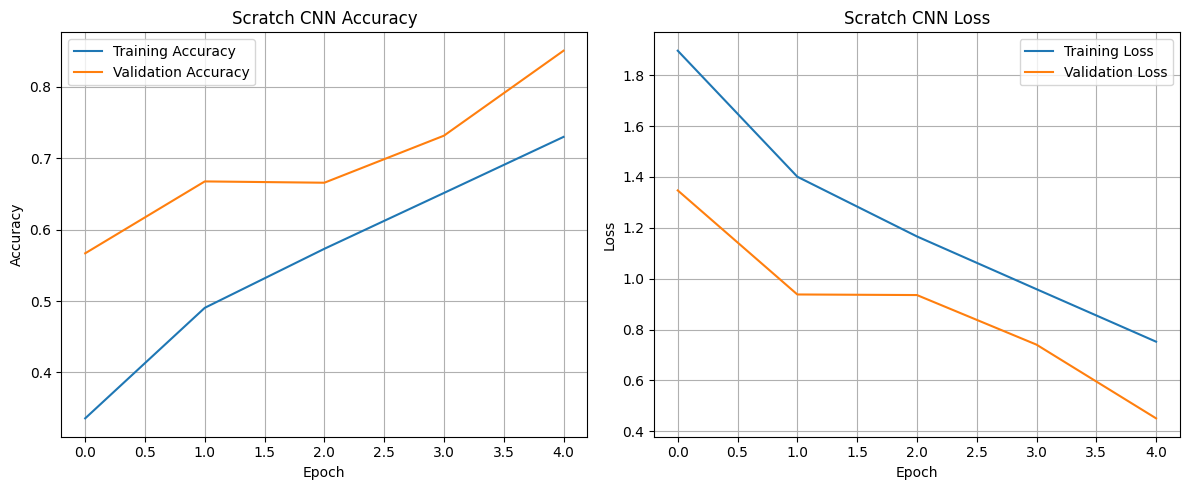

Scratch CNN - Validation Accuracy: 0.8507
New best model: Scratch CNN with Validation Accuracy: 0.8507

Experimenting with Pre-trained Models (Transfer Learning & Fine-tuning)...

--- Training and Fine-tuning VGG16 ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

VGG16 - Model Summary (Head Training):


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 134,155 (524.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG16 (Head Only) for 5 epochs...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.2994 - loss: 2.0293
Epoch 1: val_accuracy improved from -inf to 0.74451, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 580ms/step - accuracy: 0.3000 - loss: 2.0277 - val_accuracy: 0.7445 - val_loss: 1.1465
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.6355 - loss: 1.1789
Epoch 2: val_accuracy improved from 0.74451 to 0.83608, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 534ms/step - accuracy: 0.6357 - loss: 1.1784 - val_accuracy: 0.8361 - val_loss: 0.7374
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7550 - loss: 0.8409
Epoch 3: val_accuracy improved from 0.83608 to 0.87363, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 530ms/step - accuracy: 0.7550 - loss: 0.8406 - val_accuracy: 0.8736 - val_loss: 0.5406
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7954 - loss: 0.6592
Epoch 4: val_accuracy improved from 0.87363 to 0.90018, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 522ms/step - accuracy: 0.7954 - loss: 0.6591 - val_accuracy: 0.9002 - val_loss: 0.4270
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8220 - loss: 0.5568
Epoch 5: val_accuracy improved from 0.90018 to 0.92308, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 527ms/step - accuracy: 0.8220 - loss: 0.5567 - val_accuracy: 0.9231 - val_loss: 0.3711
Restoring model weights from the end of the best epoch: 5.


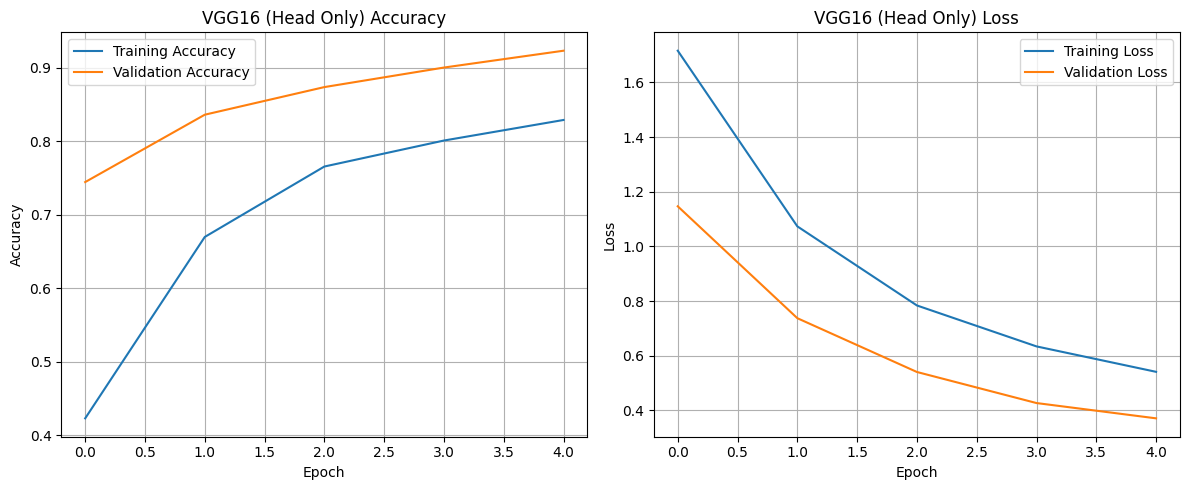


Fine-tuning VGG16 (Unfreezing top layers)...

VGG16 - Model Summary (Fine-tuning):


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 14,848,843 (56.64 MB)

 Non-trainable params: 0 (0.00 B)


Fine-tuning VGG16 for 10 epochs...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.8907 - loss: 0.3338
Epoch 1: val_accuracy improved from 0.92308 to 0.96520, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 769ms/step - accuracy: 0.8909 - loss: 0.3333 - val_accuracy: 0.9652 - val_loss: 0.1148
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.9661 - loss: 0.1176
Epoch 2: val_accuracy improved from 0.96520 to 0.98626, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 623ms/step - accuracy: 0.9661 - loss: 0.1175 - val_accuracy: 0.9863 - val_loss: 0.0620
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.9819 - loss: 0.0733
Epoch 3: val_accuracy improved from 0.98626 to 0.98901, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 632ms/step - accuracy: 0.9819 - loss: 0.0733 - val_accuracy: 0.9890 - val_loss: 0.0362
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.9807 - loss: 0.0576
Epoch 4: val_accuracy did not improve from 0.98901
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 631ms/step - accuracy: 0.9807 - loss: 0.0576 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.9875 - loss: 0.0403
Epoch 5: val_accuracy did not improve from 0.98901
195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 623ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9863 - val_loss: 0.0482
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.9885 - loss: 0.0393
Epoch 6: val_accuracy improved from 0.98901 to 0.98993, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 629ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9899 - val_loss: 0.0313
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9922 - loss: 0.0295
Epoch 7: val_accuracy improved from 0.98993 to 0.99267, saving model to best_vgg16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 149s 663ms/step - accuracy: 0.9922 - loss: 0.0295 - val_accuracy: 0.9927 - val_loss: 0.0241
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9943 - loss: 0.0184
Epoch 8: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 630ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9899 - val_loss: 0.0283
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.9930 - loss: 0.0200
Epoch 9: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 629ms/step - accuracy: 0.9930 - loss: 0.0200 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9932 - loss: 0.0230
Epoch 10: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 629ms/step - accuracy: 0.9932 - loss: 0.0230 - val_accuracy: 0.9927 - val_loss: 0.0206
Restoring model weights from the end of the best epoch: 10.


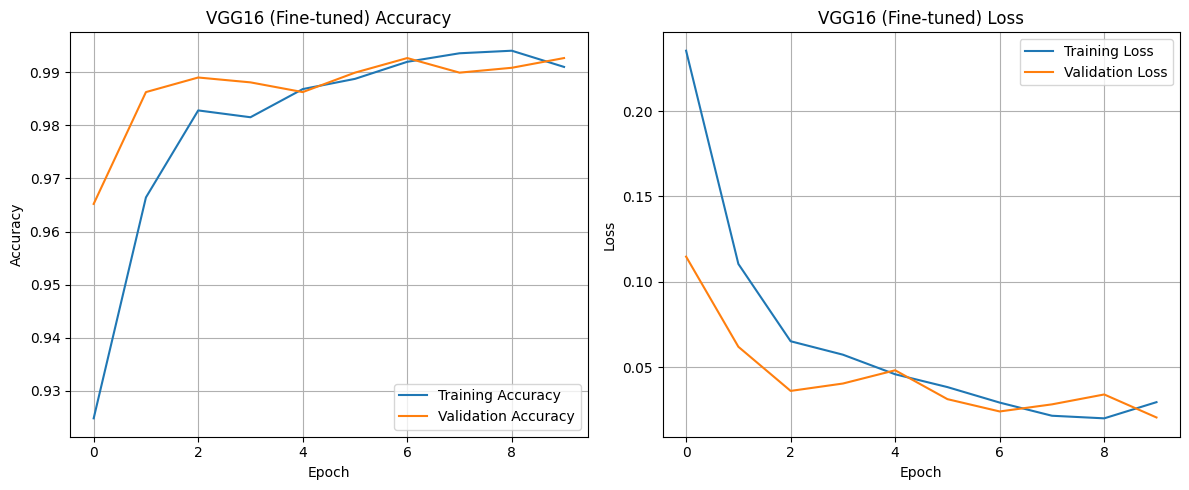

VGG16 - Validation Accuracy: 0.9927
New best model: VGG16 with Validation Accuracy: 0.9927

--- Training and Fine-tuning ResNet50 ---
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

ResNet50 - Model Summary (Head Training):


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Training ResNet50 (Head Only) for 5 epochs...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.1421 - loss: 2.4172
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 560ms/step - accuracy: 0.1421 - loss: 2.4168 - val_accuracy: 0.1712 - val_loss: 2.2482
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.1763 - loss: 2.2618
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 507ms/step - accuracy: 0.1763 - loss: 2.2617 - val_accuracy: 0.1648 - val_loss: 2.1755
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.2023 - loss: 2.1941
Epoch 3: val_accuracy improved from 0.17125 to 0.18590, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 513ms/step - accuracy: 0.2023 - loss: 2.1941 - val_accuracy: 0.1859 - val_loss: 2.1270
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.1985 - loss: 2.1659
Epoch 4: val_accuracy improved from 0.18590 to 0.22802, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 504ms/step - accuracy: 0.1985 - loss: 2.1658 - val_accuracy: 0.2280 - val_loss: 2.0772
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.2095 - loss: 2.1273
Epoch 5: val_accuracy improved from 0.22802 to 0.27656, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 517ms/step - accuracy: 0.2096 - loss: 2.1273 - val_accuracy: 0.2766 - val_loss: 2.0401
Restoring model weights from the end of the best epoch: 5.


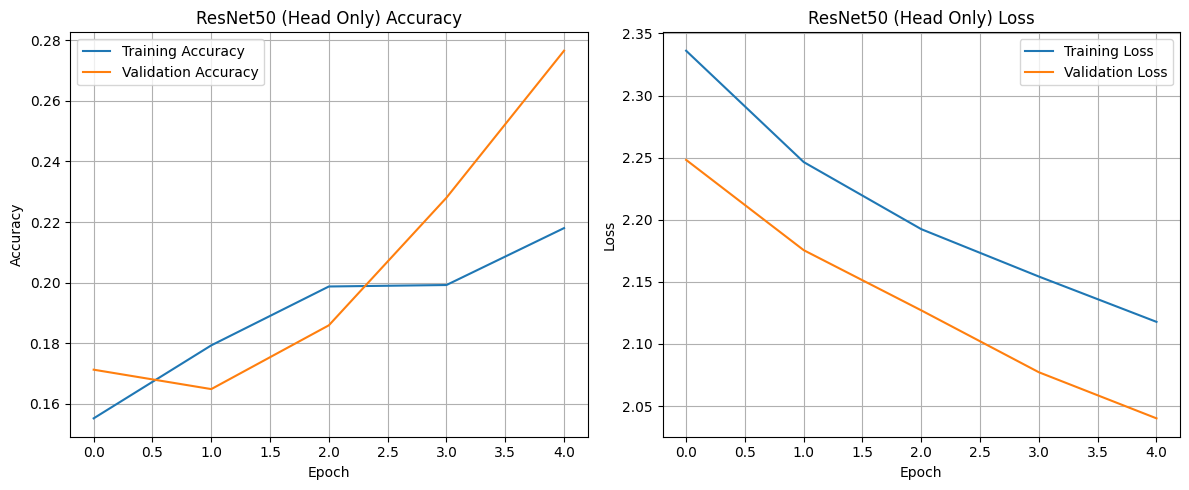


Fine-tuning ResNet50 (Unfreezing top layers)...

ResNet50 - Model Summary (Fine-tuning):


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 24,061,963 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)


Fine-tuning ResNet50 for 10 epochs...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.2048 - loss: 16.5610
Epoch 1: val_accuracy did not improve from 0.27656
195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 738ms/step - accuracy: 0.2051 - loss: 16.5203 - val_accuracy: 0.1712 - val_loss: 52.7251
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.4678 - loss: 1.8411
Epoch 2: val_accuracy did not improve from 0.27656
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 566ms/step - accuracy: 0.4682 - loss: 1.8395 - val_accuracy: 0.1712 - val_loss: 121.5886
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.7544 - loss: 0.8545
Epoch 3: val_accuracy did not improve from 0.27656
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 569ms/step - accuracy: 0.7546 - loss: 0.8540 - val_accuracy: 0.1712 - val_loss: 35.1628
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8913 - loss: 0.4185
Epoch 4: val_accuracy did not improve from 0.27656
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 57

195/195 ━━━━━━━━━━━━━━━━━━━━ 114s 584ms/step - accuracy: 0.9318 - loss: 0.2642 - val_accuracy: 0.7784 - val_loss: 0.8318
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.9641 - loss: 0.1471
Epoch 6: val_accuracy improved from 0.77839 to 0.98443, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 577ms/step - accuracy: 0.9641 - loss: 0.1471 - val_accuracy: 0.9844 - val_loss: 0.0590
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.9724 - loss: 0.1132
Epoch 7: val_accuracy improved from 0.98443 to 0.99084, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 113s 575ms/step - accuracy: 0.9724 - loss: 0.1132 - val_accuracy: 0.9908 - val_loss: 0.0363
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9839 - loss: 0.0687
Epoch 8: val_accuracy improved from 0.99084 to 0.99451, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.9839 - loss: 0.0687 - val_accuracy: 0.9945 - val_loss: 0.0242
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.9838 - loss: 0.0644
Epoch 9: val_accuracy did not improve from 0.99451
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.9838 - loss: 0.0645 - val_accuracy: 0.9945 - val_loss: 0.0212
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.9845 - loss: 0.0592
Epoch 10: val_accuracy improved from 0.99451 to 0.99634, saving model to best_resnet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 573ms/step - accuracy: 0.9845 - loss: 0.0592 - val_accuracy: 0.9963 - val_loss: 0.0126
Restoring model weights from the end of the best epoch: 10.


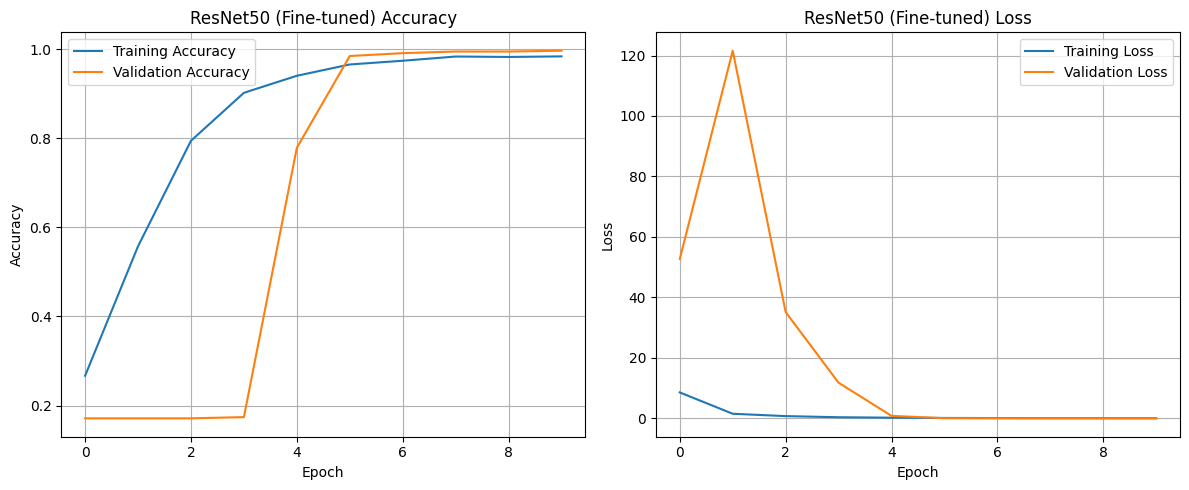

ResNet50 - Validation Accuracy: 0.9963
New best model: ResNet50 with Validation Accuracy: 0.9963

--- Training and Fine-tuning MobileNet ---
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

MobileNet - Model Summary (Head Training):


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,494,091 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)


Training MobileNet (Head Only) for 5 epochs...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.6230 - loss: 1.2095
Epoch 1: val_accuracy improved from -inf to 0.97894, saving model to best_mobilenet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 524ms/step - accuracy: 0.6239 - loss: 1.2067 - val_accuracy: 0.9789 - val_loss: 0.0915
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.9326 - loss: 0.2117
Epoch 2: val_accuracy improved from 0.97894 to 0.98993, saving model to best_mobilenet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 483ms/step - accuracy: 0.9326 - loss: 0.2116 - val_accuracy: 0.9899 - val_loss: 0.0497
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9504 - loss: 0.1412
Epoch 3: val_accuracy did not improve from 0.98993
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 474ms/step - accuracy: 0.9504 - loss: 0.1412 - val_accuracy: 0.9771 - val_loss: 0.0592
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9609 - loss: 0.1207
Epoch 4: val_accuracy improved from 0.98993 to 0.99267, saving model to best_mobilenet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 474ms/step - accuracy: 0.9609 - loss: 0.1207 - val_accuracy: 0.9927 - val_loss: 0.0239
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9698 - loss: 0.0912
Epoch 5: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 472ms/step - accuracy: 0.9698 - loss: 0.0912 - val_accuracy: 0.9908 - val_loss: 0.0287
Restoring model weights from the end of the best epoch: 4.


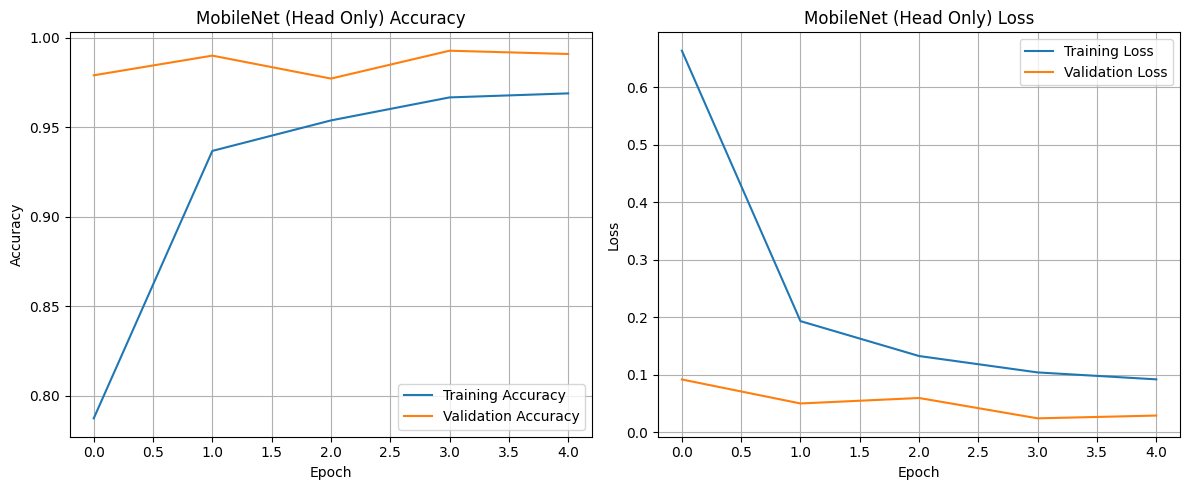


Fine-tuning MobileNet (Unfreezing top layers)...

MobileNet - Model Summary (Fine-tuning):


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,494,091 (13.33 MB)

 Trainable params: 3,472,203 (13.25 MB)

 Non-trainable params: 21,888 (85.50 KB)


Fine-tuning MobileNet for 10 epochs...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.4404 - loss: 3.9355
Epoch 1: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 136s 562ms/step - accuracy: 0.4413 - loss: 3.9270 - val_accuracy: 0.9799 - val_loss: 0.0763
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.8841 - loss: 0.3850
Epoch 2: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 505ms/step - accuracy: 0.8842 - loss: 0.3846 - val_accuracy: 0.9863 - val_loss: 0.0478
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.9468 - loss: 0.1827
Epoch 3: val_accuracy did not improve from 0.99267
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 505ms/step - accuracy: 0.9468 - loss: 0.1825 - val_accuracy: 0.9927 - val_loss: 0.0256
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.9530 - loss: 0.1597
Epoch 4: val_accuracy improved from 0.99267 to 0.99725, saving model to best_mobilenet_model.h

195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 536ms/step - accuracy: 0.9531 - loss: 0.1595 - val_accuracy: 0.9973 - val_loss: 0.0145
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9673 - loss: 0.0946
Epoch 5: val_accuracy did not improve from 0.99725
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 498ms/step - accuracy: 0.9673 - loss: 0.0946 - val_accuracy: 0.9973 - val_loss: 0.0134
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.9687 - loss: 0.0904
Epoch 6: val_accuracy did not improve from 0.99725
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 492ms/step - accuracy: 0.9687 - loss: 0.0903 - val_accuracy: 0.9963 - val_loss: 0.0093
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.9817 - loss: 0.0504
Epoch 7: val_accuracy did not improve from 0.99725
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.9817 - loss: 0.0505 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9839 - loss: 0.0441
Epoch 8: val_

195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.9806 - loss: 0.0499 - val_accuracy: 0.9982 - val_loss: 0.0078
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9900 - loss: 0.0316
Epoch 10: val_accuracy did not improve from 0.99817
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 504ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9982 - val_loss: 0.0085
Restoring model weights from the end of the best epoch: 9.


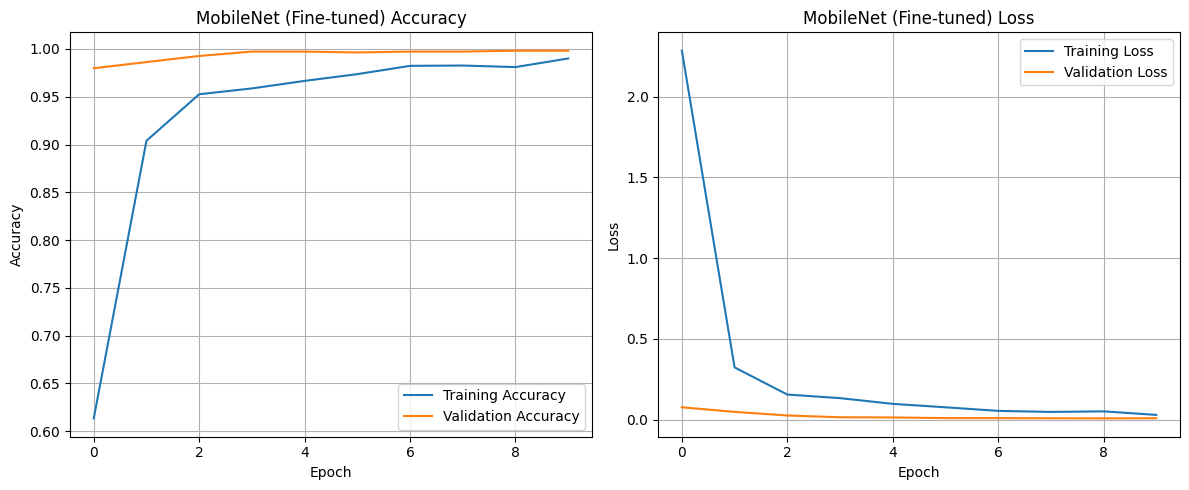

MobileNet - Validation Accuracy: 0.9982
New best model: MobileNet with Validation Accuracy: 0.9982

--- Training and Fine-tuning InceptionV3 ---
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

InceptionV3 - Model Summary (Head Training):


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)


Training InceptionV3 (Head Only) for 5 epochs...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.5634 - loss: 1.3936
Epoch 1: val_accuracy improved from -inf to 0.92674, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 629ms/step - accuracy: 0.5642 - loss: 1.3909 - val_accuracy: 0.9267 - val_loss: 0.2825
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8534 - loss: 0.4494
Epoch 2: val_accuracy improved from 0.92674 to 0.93864, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.8534 - loss: 0.4493 - val_accuracy: 0.9386 - val_loss: 0.1914
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8852 - loss: 0.3503
Epoch 3: val_accuracy improved from 0.93864 to 0.95238, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 514ms/step - accuracy: 0.8852 - loss: 0.3503 - val_accuracy: 0.9524 - val_loss: 0.1596
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8973 - loss: 0.3212
Epoch 4: val_accuracy did not improve from 0.95238
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 513ms/step - accuracy: 0.8973 - loss: 0.3212 - val_accuracy: 0.9478 - val_loss: 0.1462
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9079 - loss: 0.2725
Epoch 5: val_accuracy improved from 0.95238 to 0.96520, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.9079 - loss: 0.2725 - val_accuracy: 0.9652 - val_loss: 0.1085
Restoring model weights from the end of the best epoch: 5.


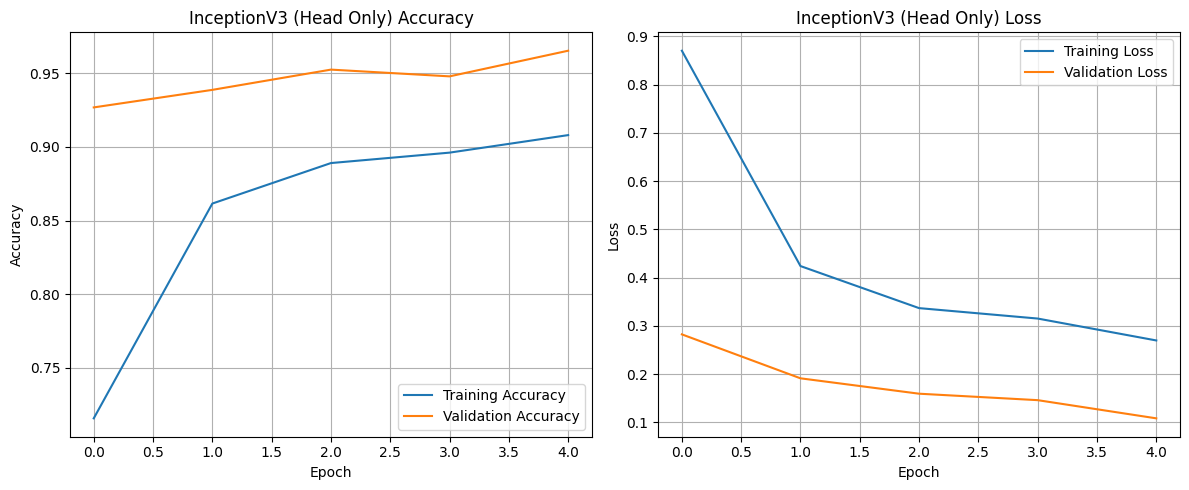


Fine-tuning InceptionV3 (Unfreezing top layers)...

InceptionV3 - Model Summary (Fine-tuning):


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 22,295,723 (85.05 MB)

 Non-trainable params: 34,432 (134.50 KB)


Fine-tuning InceptionV3 for 10 epochs...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.4526 - loss: 2.5460
Epoch 1: val_accuracy improved from 0.96520 to 0.96795, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 238s 815ms/step - accuracy: 0.4537 - loss: 2.5399 - val_accuracy: 0.9679 - val_loss: 0.1101
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9149 - loss: 0.2908
Epoch 2: val_accuracy improved from 0.96795 to 0.98626, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 574ms/step - accuracy: 0.9150 - loss: 0.2906 - val_accuracy: 0.9863 - val_loss: 0.0775
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9516 - loss: 0.1676
Epoch 3: val_accuracy improved from 0.98626 to 0.98901, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 553ms/step - accuracy: 0.9516 - loss: 0.1675 - val_accuracy: 0.9890 - val_loss: 0.0560
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9712 - loss: 0.1120
Epoch 4: val_accuracy improved from 0.98901 to 0.98993, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 553ms/step - accuracy: 0.9712 - loss: 0.1120 - val_accuracy: 0.9899 - val_loss: 0.0382
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9720 - loss: 0.0961
Epoch 5: val_accuracy improved from 0.98993 to 0.99084, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 145s 568ms/step - accuracy: 0.9720 - loss: 0.0960 - val_accuracy: 0.9908 - val_loss: 0.0250
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9813 - loss: 0.0640
Epoch 6: val_accuracy improved from 0.99084 to 0.99176, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 560ms/step - accuracy: 0.9813 - loss: 0.0640 - val_accuracy: 0.9918 - val_loss: 0.0212
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9841 - loss: 0.0553
Epoch 7: val_accuracy improved from 0.99176 to 0.99542, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.9841 - loss: 0.0553 - val_accuracy: 0.9954 - val_loss: 0.0148
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9861 - loss: 0.0472
Epoch 8: val_accuracy did not improve from 0.99542
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 545ms/step - accuracy: 0.9861 - loss: 0.0472 - val_accuracy: 0.9954 - val_loss: 0.0131
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9885 - loss: 0.0387
Epoch 9: val_accuracy improved from 0.99542 to 0.99725, saving model to best_inceptionv3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 554ms/step - accuracy: 0.9885 - loss: 0.0387 - val_accuracy: 0.9973 - val_loss: 0.0111
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9884 - loss: 0.0400
Epoch 10: val_accuracy did not improve from 0.99725
195/195 ━━━━━━━━━━━━━━━━━━━━ 108s 551ms/step - accuracy: 0.9884 - loss: 0.0400 - val_accuracy: 0.9973 - val_loss: 0.0110
Restoring model weights from the end of the best epoch: 10.


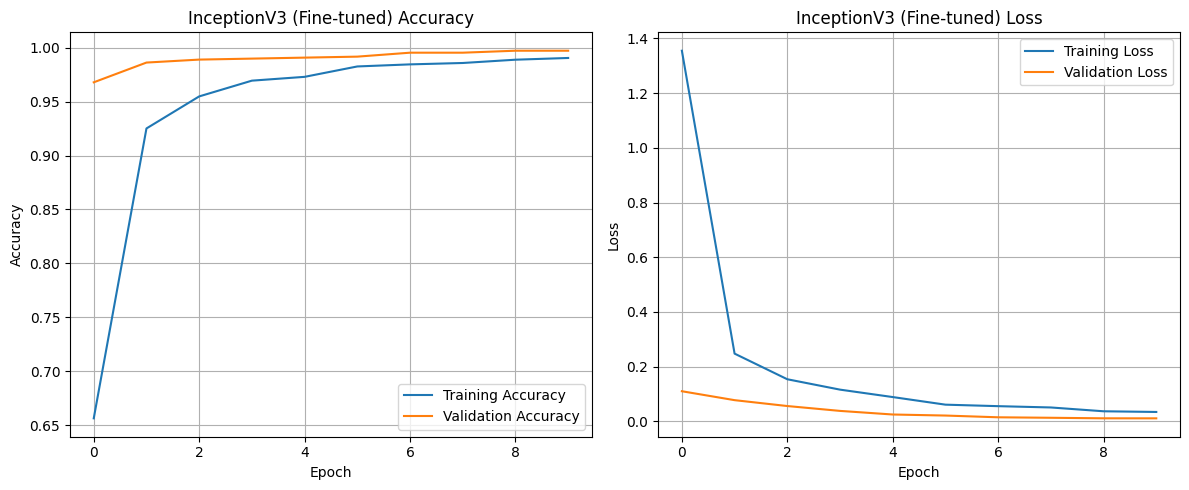

InceptionV3 - Validation Accuracy: 0.9973

--- Training and Fine-tuning EfficientNetB0 ---
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

EfficientNetB0 - Model Summary (Head Training):


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,380,334 (16.71 MB)

 Trainable params: 330,763 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)


Training EfficientNetB0 (Head Only) for 5 epochs...
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.1433 - loss: 2.3865
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 641ms/step - accuracy: 0.1433 - loss: 2.3863 - val_accuracy: 0.1712 - val_loss: 2.3215
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.1647 - loss: 2.3232
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.1647 - loss: 2.3232 - val_accuracy: 0.1712 - val_loss: 2.3099
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.1720 - loss: 2.3178
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 488ms/step - accuracy: 0.1721 - loss: 2.3177 - val_accuracy: 0.1712 - val_loss: 2.3104
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.1785 - loss: 2.3025
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 492ms/step - accuracy: 0.1785 - loss: 2.3025 - val_accuracy: 0.1712 - val_loss: 2.3124
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.1777 - loss: 2.3050
Epoch 5: val_accu

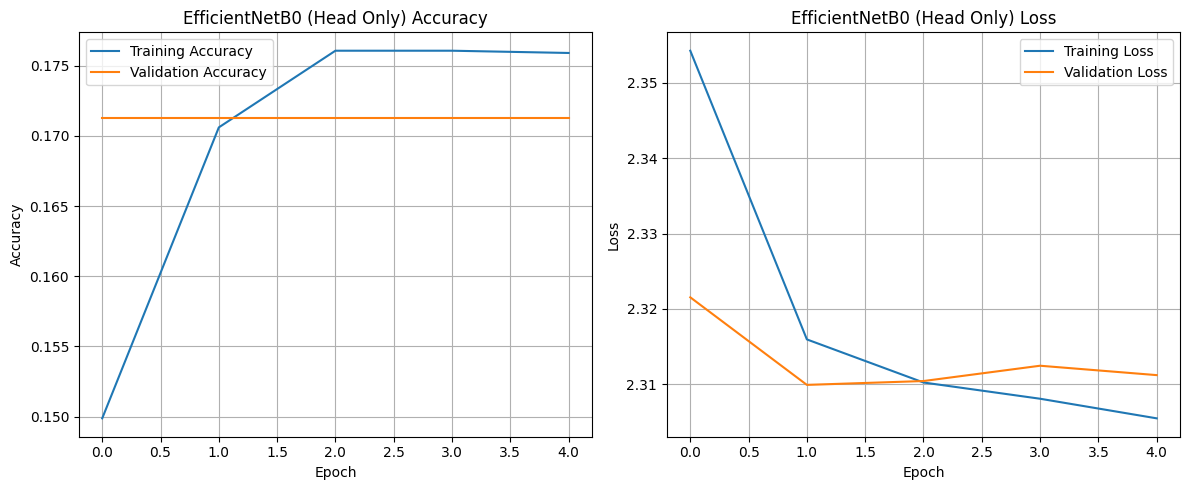


Fine-tuning EfficientNetB0 (Unfreezing top layers)...

EfficientNetB0 - Model Summary (Fine-tuning):


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,380,334 (16.71 MB)

 Trainable params: 4,338,311 (16.55 MB)

 Non-trainable params: 42,023 (164.16 KB)


Fine-tuning EfficientNetB0 for 10 epochs...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.1152 - loss: 2.8372
Epoch 1: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 224s 769ms/step - accuracy: 0.1154 - loss: 2.8358 - val_accuracy: 0.1117 - val_loss: 2.3441
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.3060 - loss: 2.0509
Epoch 2: val_accuracy improved from 0.17125 to 0.24267, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 513ms/step - accuracy: 0.3063 - loss: 2.0502 - val_accuracy: 0.2427 - val_loss: 2.1563
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.5219 - loss: 1.5478
Epoch 3: val_accuracy improved from 0.24267 to 0.59982, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 528ms/step - accuracy: 0.5220 - loss: 1.5473 - val_accuracy: 0.5998 - val_loss: 1.4585
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.6657 - loss: 1.1814
Epoch 4: val_accuracy improved from 0.59982 to 0.64744, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 526ms/step - accuracy: 0.6658 - loss: 1.1808 - val_accuracy: 0.6474 - val_loss: 1.2653
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.7732 - loss: 0.8459
Epoch 5: val_accuracy improved from 0.64744 to 0.81502, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 526ms/step - accuracy: 0.7734 - loss: 0.8456 - val_accuracy: 0.8150 - val_loss: 0.7900
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8602 - loss: 0.5724
Epoch 6: val_accuracy did not improve from 0.81502
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 518ms/step - accuracy: 0.8602 - loss: 0.5723 - val_accuracy: 0.6676 - val_loss: 0.9818
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9005 - loss: 0.4226
Epoch 7: val_accuracy improved from 0.81502 to 0.87912, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 516ms/step - accuracy: 0.9006 - loss: 0.4225 - val_accuracy: 0.8791 - val_loss: 0.5224
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9192 - loss: 0.3268
Epoch 8: val_accuracy improved from 0.87912 to 0.96154, saving model to best_efficientnetb0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 519ms/step - accuracy: 0.9192 - loss: 0.3267 - val_accuracy: 0.9615 - val_loss: 0.2264
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9369 - loss: 0.2555
Epoch 9: val_accuracy did not improve from 0.96154
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 516ms/step - accuracy: 0.9369 - loss: 0.2555 - val_accuracy: 0.9277 - val_loss: 0.4363
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9516 - loss: 0.2004
Epoch 10: val_accuracy did not improve from 0.96154
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 513ms/step - accuracy: 0.9517 - loss: 0.2004 - val_accuracy: 0.7244 - val_loss: 0.8069
Restoring model weights from the end of the best epoch: 8.


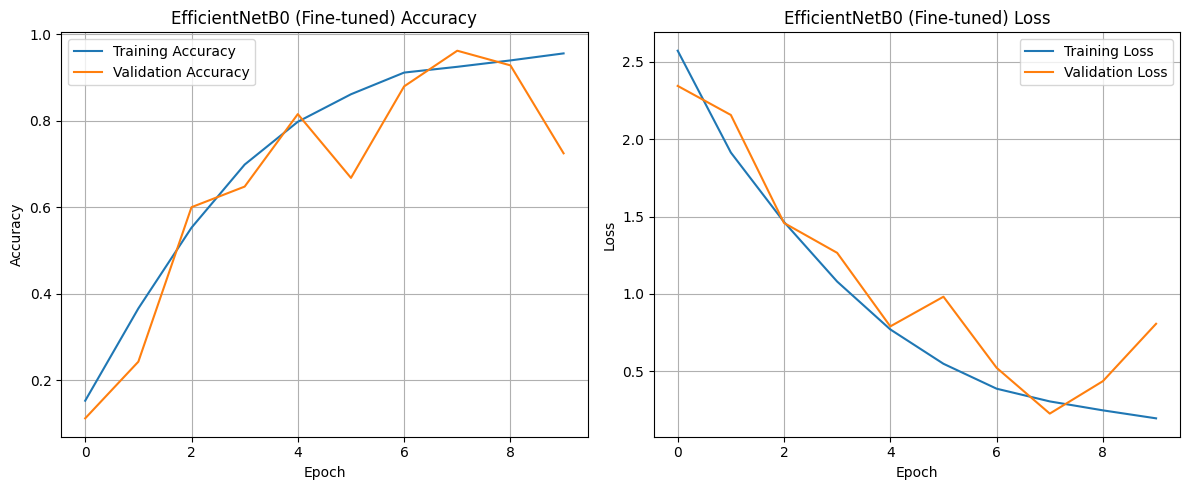

EfficientNetB0 - Validation Accuracy: 0.9615

--- Model Training Complete ---

Overall best model (MobileNet) saved at: best_mobilenet_model.h5


In [6]:
# @title Model Training

print("\n--- Starting Model Training ---")

# Global variables to store the best model and its accuracy
best_model = None
best_accuracy = -1.0
best_model_name = ""
best_model_save_path = ""

# Define common training parameters
EPOCHS_INITIAL = 5
EPOCHS_FINE_TUNE = 10
LEARNING_RATE_INITIAL = 1e-3
LEARNING_RATE_FINE_TUNE = 1e-5 # Smaller learning rate for fine-tuning

# Function to plot training history
def plot_training_history(history, model_name):

    #Plots training and validation accuracy and loss
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 1. Train a CNN model from scratch
print("\nTraining CNN Model from Scratch...")

def build_scratch_cnn(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)                        # Use functional API for clarity with Input layer
    return model

scratch_cnn_model = build_scratch_cnn((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
scratch_cnn_model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE_INITIAL),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
scratch_cnn_model.summary()

# Define callbacks for the scratch model
scratch_model_checkpoint = ModelCheckpoint(
    filepath='best_scratch_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

print(f"\nTraining Scratch CNN for {EPOCHS_INITIAL} epochs...")
history_scratch = scratch_cnn_model.fit(
    train_ds,
    epochs=EPOCHS_INITIAL,
    validation_data=valid_ds,
    callbacks=[scratch_model_checkpoint, early_stopping]
)

plot_training_history(history_scratch, "Scratch CNN")

# Evaluate scratch model
scratch_val_loss, scratch_val_accuracy = scratch_cnn_model.evaluate(valid_ds, verbose=0)
print(f"Scratch CNN - Validation Accuracy: {scratch_val_accuracy:.4f}")

# Update best model if scratch CNN is better
if scratch_val_accuracy > best_accuracy:
    best_accuracy = scratch_val_accuracy
    best_model_name = "Scratch CNN"
    best_model_save_path = 'best_scratch_cnn_model.h5'                          # This will be the path where ModelCheckpoint saved it.
    print(f"New best model: {best_model_name} with Validation Accuracy: {best_accuracy:.4f}")



# 2. Experiment with pre-trained models and fine-tuning
print("\nExperimenting with Pre-trained Models (Transfer Learning & Fine-tuning)...")

# Dictionary of pre-trained models
pretrained_models = {
    "VGG16": VGG16,
    "ResNet50": ResNet50,
    "MobileNet": MobileNet,
    "InceptionV3": InceptionV3,
    "EfficientNetB0": EfficientNetB0
}

# Loop through each pre-trained model
for model_name, base_model_class in pretrained_models.items():
    print(f"\n--- Training and Fine-tuning {model_name} ---")

    # Load the pre-trained base model
    # Note: input_shape must match the target_size of your ImageDataGenerator
    base_model = base_model_class(weights='imagenet',
                                  include_top=False, # Do not include the top classification layer
                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # Freeze the base model layers initially
    base_model.trainable = False

    # Create a new model on top of the pre-trained base
    inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = base_model(inputs, training=False) # Important: set training=False when using base_model as feature extractor
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs, outputs)

    # Compile the model for initial training of the new head
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE_INITIAL),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n{model_name} - Model Summary (Head Training):")
    model.summary()

    # Define callbacks for this specific model
    model_checkpoint_path = f'best_{model_name.lower()}_model.h5'
    model_checkpoint = ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    early_stopping_ft = EarlyStopping(
        monitor='val_loss',
        patience=3, # Reduced patience for faster stopping
        restore_best_weights=True,
        verbose=1
    )

    print(f"\nTraining {model_name} (Head Only) for {EPOCHS_INITIAL} epochs...")
    history_head = model.fit(
        train_ds,
        epochs=EPOCHS_INITIAL,
        validation_data=valid_ds,
        callbacks=[model_checkpoint, early_stopping_ft]
    )

    plot_training_history(history_head, f"{model_name} (Head Only)")

    # Fine-tuning: Unfreeze some layers of the base model
    print(f"\nFine-tuning {model_name} (Unfreezing top layers)...")
    base_model.trainable = True # Unfreeze all layers of the base model

    # It's common to unfreeze only a portion of the base model.
    # For simplicity here, we unfreeze all, but you can iterate through layers
    # and set `layer.trainable = True` for a specific number of top layers.
    # Example:
    # for layer in base_model.layers[-30:]: # Unfreeze last 30 layers
    #     layer.trainable = True

    # Recompile the model with a much lower learning rate for fine-tuning
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE_FINE_TUNE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n{model_name} - Model Summary (Fine-tuning):")
    model.summary()

    print(f"\nFine-tuning {model_name} for {EPOCHS_FINE_TUNE} epochs...")
    history_fine_tune = model.fit(
        train_ds,
        epochs=EPOCHS_FINE_TUNE,
        validation_data=valid_ds,
        callbacks=[model_checkpoint, early_stopping_ft] # Use the same checkpoint to save the best fine-tuned model
    )

    plot_training_history(history_fine_tune, f"{model_name} (Fine-tuned)")

    # Evaluate the fine-tuned model
    val_loss, val_accuracy = model.evaluate(valid_ds, verbose=0)
    print(f"{model_name} - Validation Accuracy: {val_accuracy:.4f}")

    # Update best model if current model is better
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model_name = model_name
        best_model_save_path = model_checkpoint_path
        print(f"New best model: {best_model_name} with Validation Accuracy: {best_accuracy:.4f}")

print("\n--- Model Training Complete ---")

# Save the overall best model
if best_model_save_path:
    print(f"\nOverall best model ({best_model_name}) saved at: {best_model_save_path}")
else:
    print("\nNo model was saved. Check training process.")


--- Starting Model Evaluation ---

Loading and Evaluating Scratch CNN from best_scratch_cnn_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step
  Scratch CNN - Test Accuracy: 0.8441
  Scratch CNN - Precision: 0.8449
  Scratch CNN - Recall: 0.8441
  Scratch CNN - F1-Score: 0.8339

Loading and Evaluating VGG16 from best_vgg16_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step
  VGG16 - Test Accuracy: 0.9978
  VGG16 - Precision: 0.9978
  VGG16 - Recall: 0.9978
  VGG16 - F1-Score: 0.9974

Loading and Evaluating ResNet50 from best_resnet50_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step
  ResNet50 - Test Accuracy: 0.9984
  ResNet50 - Precision: 0.9984
  ResNet50 - Recall: 0.9984
  ResNet50 - F1-Score: 0.9984

Loading and Evaluating MobileNet from best_mobilenet_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step
  MobileNet - Test Accuracy: 0.9987
  MobileNet - Precision: 0.9987
  MobileNet - Recall: 0.9987
  MobileNet - F1-Score: 0.9987

Loading and Evaluating InceptionV3 from best_inceptionv3_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step
  InceptionV3 - Test Accuracy: 0.9975
  InceptionV3 - Precision: 0.9972
  InceptionV3 - Recall: 0.9975
  InceptionV3 - F1-Score: 0.9971

Loading and Evaluating EfficientNetB0 from best_efficientnetb0_model.h5 on Test Set...


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step
  EfficientNetB0 - Test Accuracy: 0.0979
  EfficientNetB0 - Precision: 0.1018
  EfficientNetB0 - Recall: 0.0979
  EfficientNetB0 - F1-Score: 0.0512

--- Comparing Metrics Across All Models ---


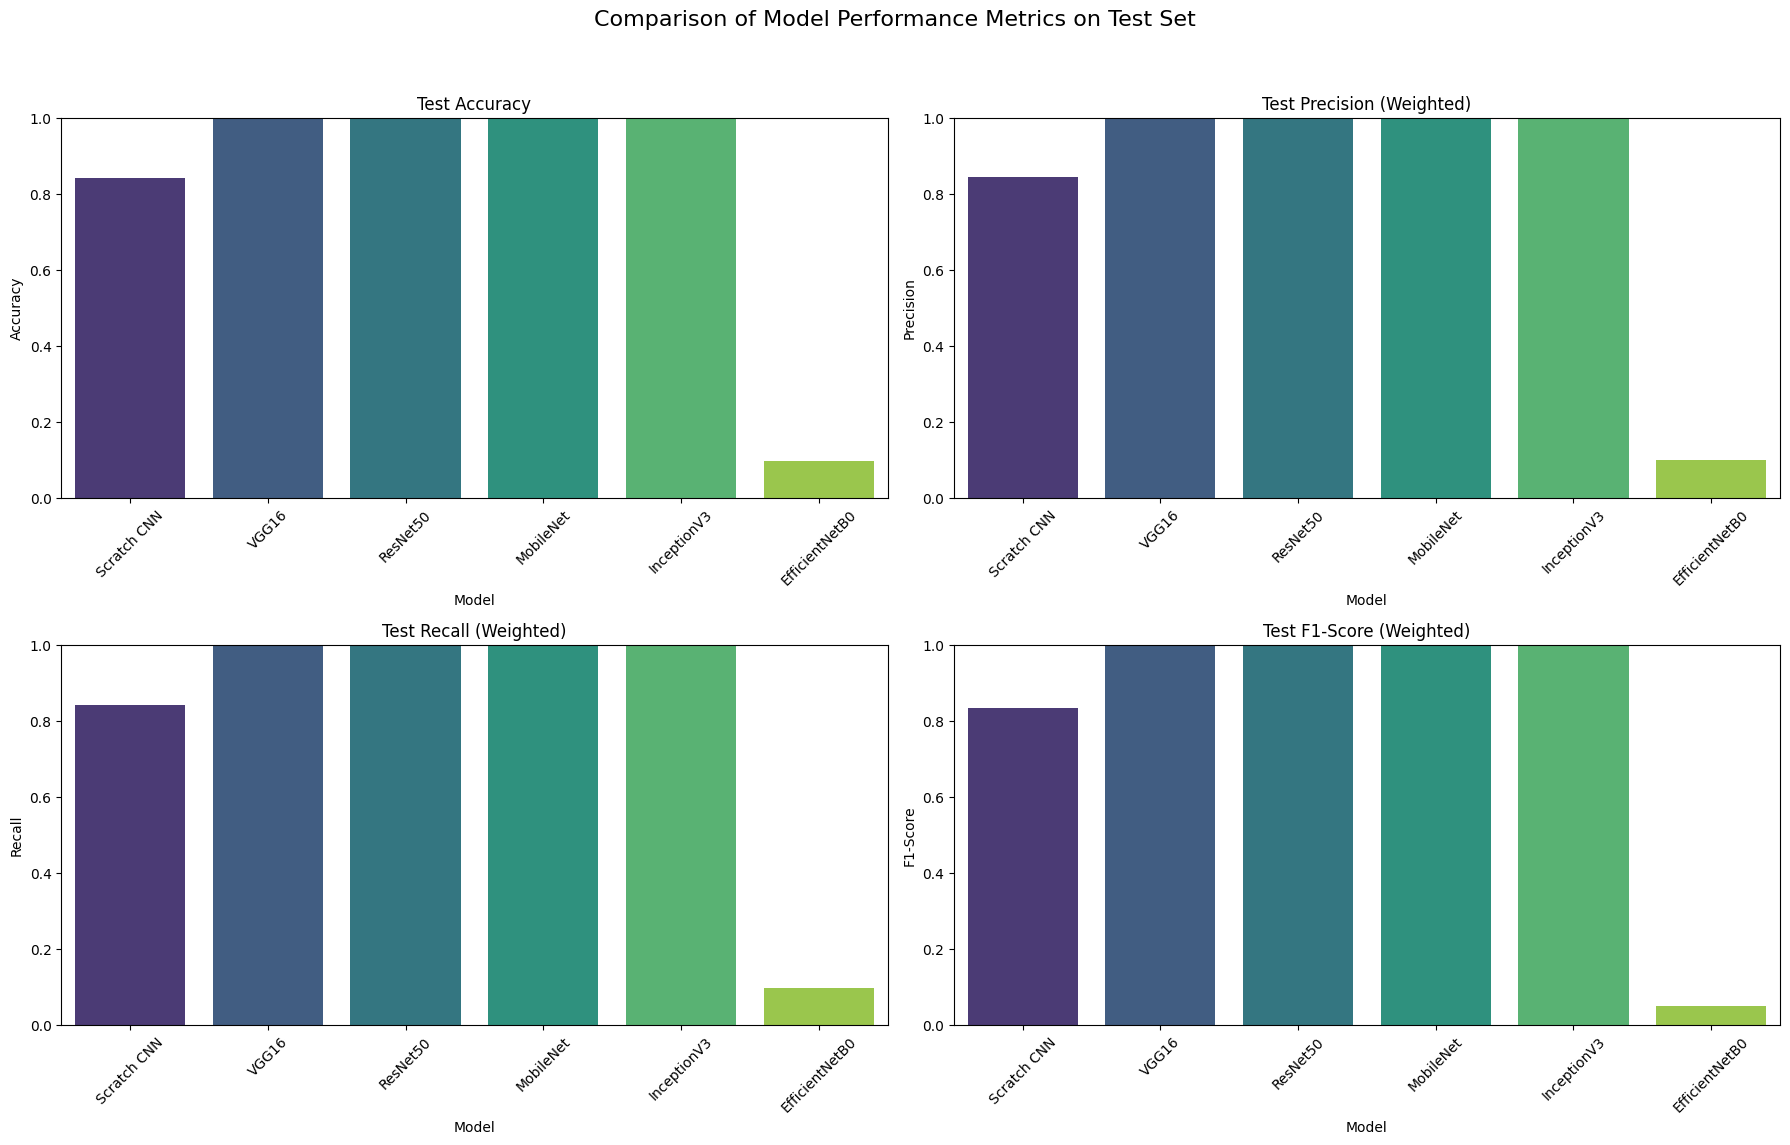


--- Visualizing Confusion Matrices ---


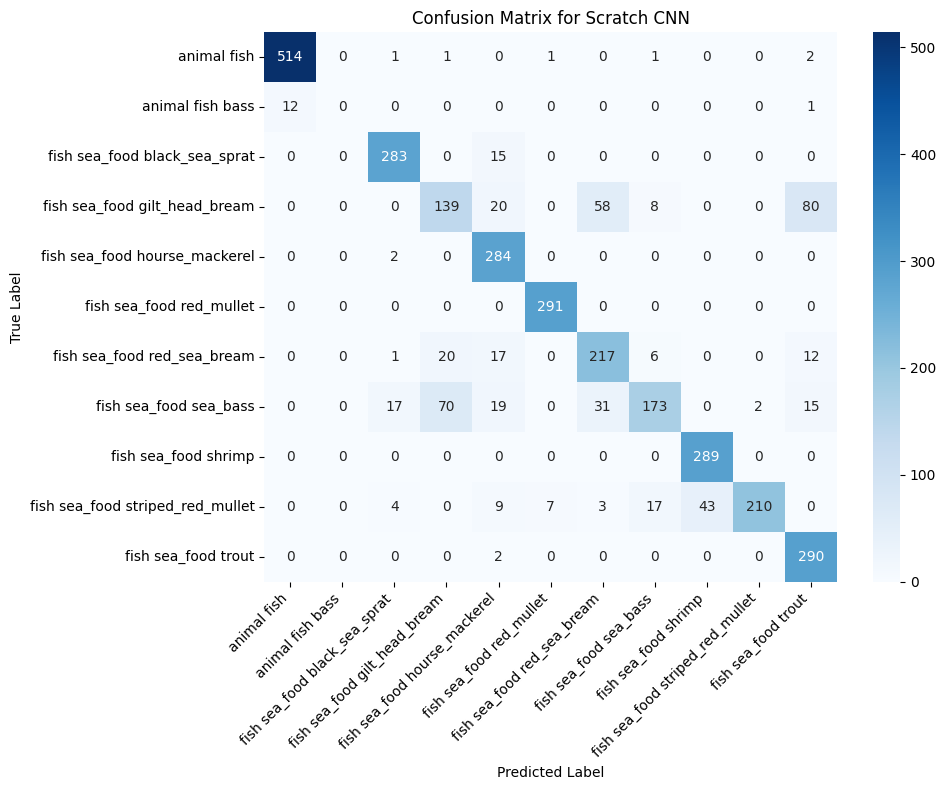

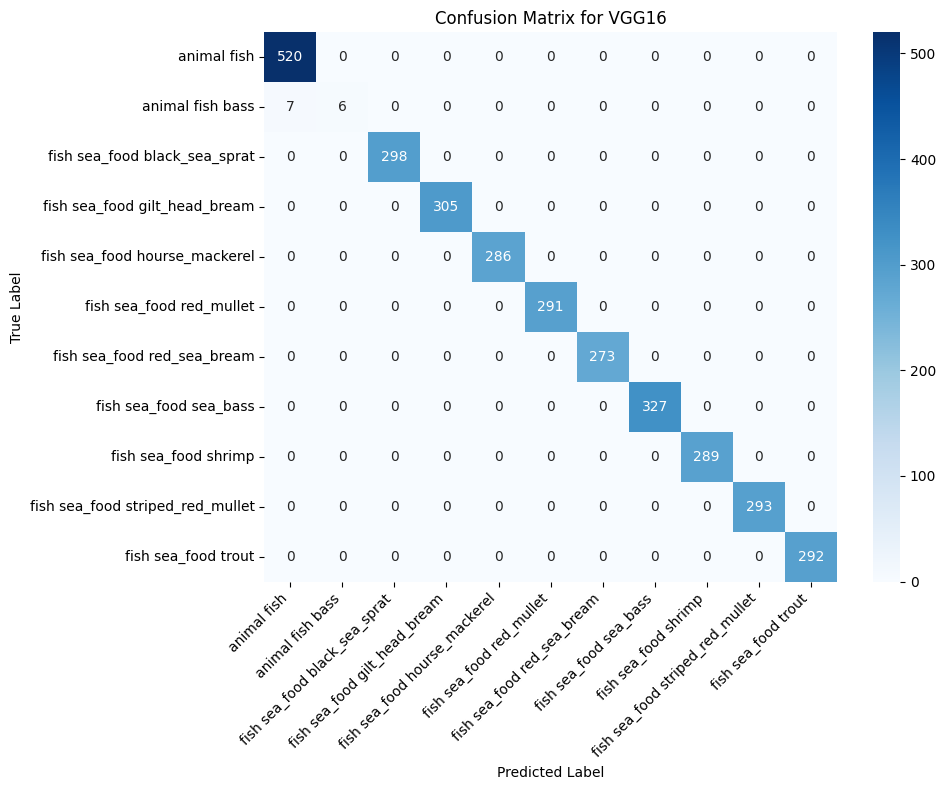

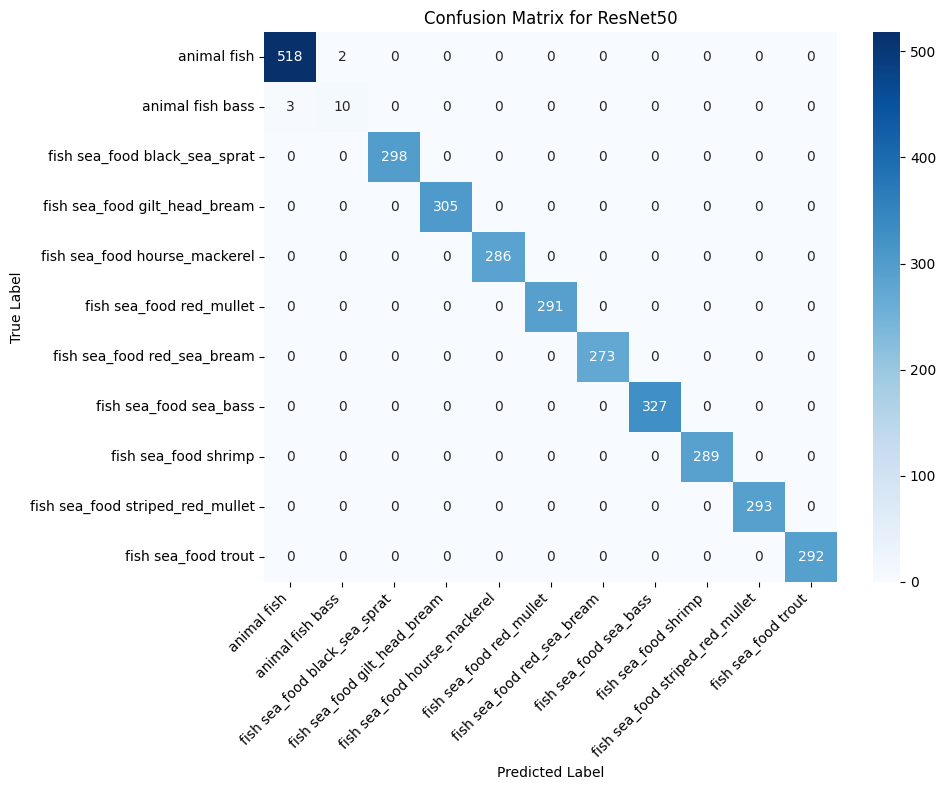

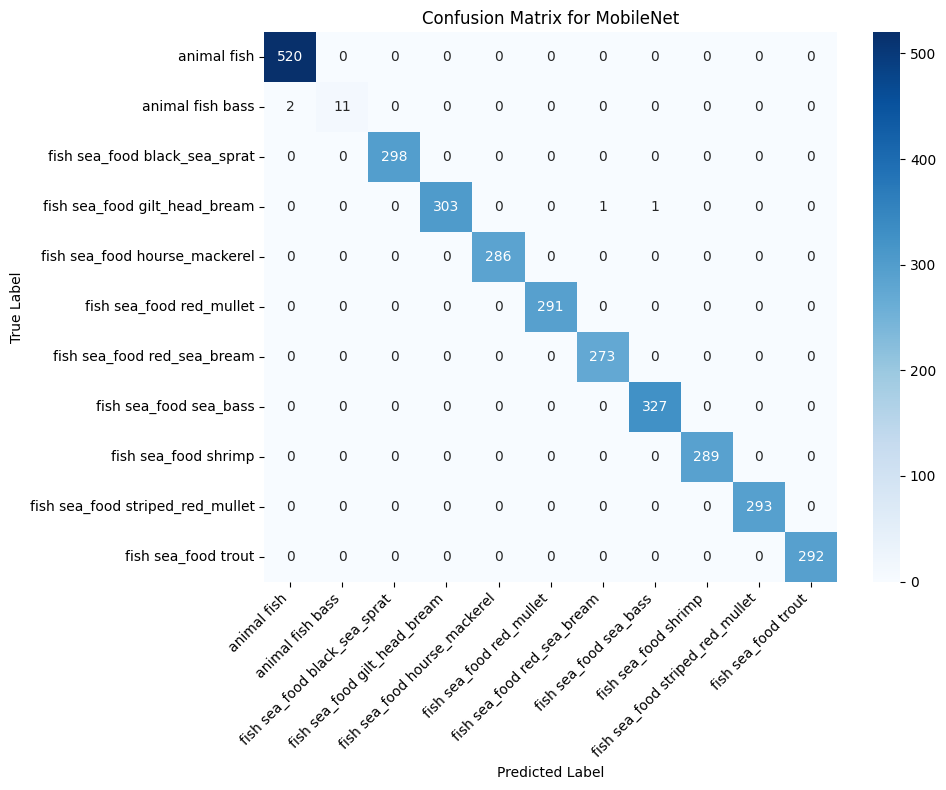

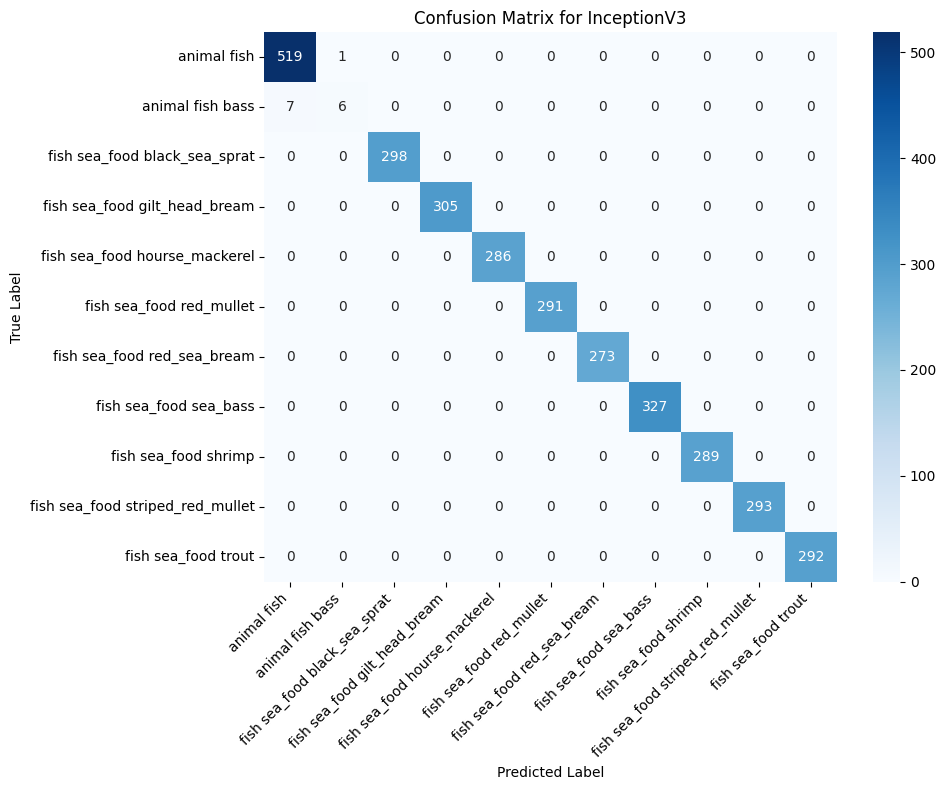

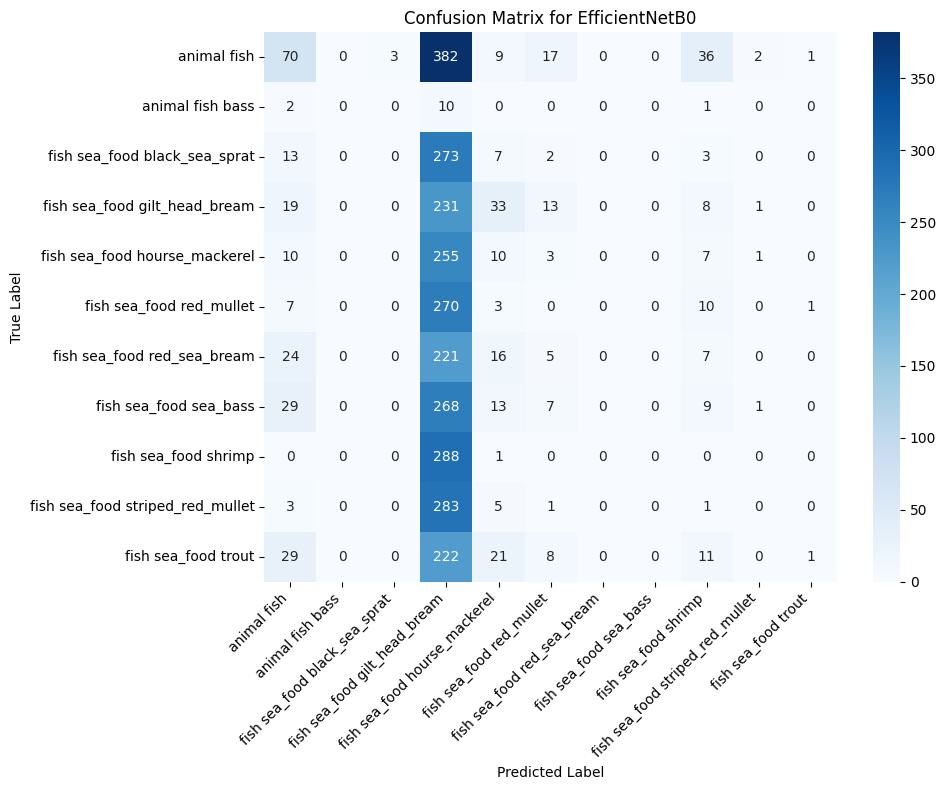


--- Inference from Model Evaluation ---

Based on Test Accuracy, the best performing model is: **MobileNet**
Achieved Test Accuracy: **0.9987**
The model was likely saved at: best_mobilenet_model.h5
Other metrics for MobileNet:
  Precision: 0.9987
  Recall: 0.9987
  F1-Score: 0.9987

Further Observations:
- **Training History:** Please refer back to the plots generated in the 'Model Training' section for the accuracy and loss curves of each model (both head-only and fine-tuned phases).         These plots provide insights into convergence and potential overfitting during training.
- **Overall Performance:** The bar charts above visually compare the final test accuracy, precision, recall, and F1-score across all models.         This helps in quickly identifying which model performs best on various aspects.
- **Class-wise Performance:** The confusion matrices help identify which specific fish classes are being confused by each model.         High values off the main diagonal indicate mi

In [7]:
# @title Model Evaluation

print("\n--- Starting Model Evaluation ---")

# List to store results of all evaluated models for comparison
evaluated_model_results = []

# Helper function to load a model, evaluate it, and store metrics
def load_evaluate_and_store_metrics(model_path, model_name, test_data_generator, classes):
    """Loads a model, evaluates it on the test set, and stores metrics."""
    print(f"\nLoading and Evaluating {model_name} from {model_path} on Test Set...")
    try:
        model = tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"  Error loading model {model_name} from {model_path}: {e}")
        return None

    # Predict probabilities on the test set
    test_data_generator.reset() # Ensure predictions are in order
    y_pred_probs = model.predict(test_data_generator)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)

    # Get true labels (ensure consistent order with predictions)
    y_true_labels = test_data_generator.classes

    # Calculate metrics
    accuracy = model.evaluate(test_data_generator, verbose=0)[1] # Get accuracy from evaluate
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    print(f"  {model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"  {model_name} - Precision: {precision:.4f}")
    print(f"  {model_name} - Recall: {recall:.4f}")
    print(f"  {model_name} - F1-Score: {f1:.4f}")

    evaluated_model_results.append({
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    })
    return accuracy # Return accuracy for best model tracking

# Evaluate Scratch CNN
scratch_model_path = 'best_scratch_cnn_model.h5'
scratch_accuracy = load_evaluate_and_store_metrics(scratch_model_path, "Scratch CNN", test_ds, inferred_class_names)

# Evaluate Pre-trained Models (assuming they were saved with 'best_{model_name.lower()}_model.h5' names)
pretrained_model_names = ["VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]
for model_name in pretrained_model_names:
    model_path = f'best_{model_name.lower()}_model.h5'
    load_evaluate_and_store_metrics(model_path, model_name, test_ds, inferred_class_names)


# Ensure evaluated_model_results contains data from all models
if not evaluated_model_results:
    print("No model results found. Please ensure the 'Model Training' section ran successfully and saved models.")
else:
    # 1. Compare metrics (Accuracy, Precision, Recall, F1-score) across all models
    print("\n--- Comparing Metrics Across All Models ---")

    metrics_data = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    for res in evaluated_model_results:
        metrics_data['Model'].append(res['model_name'])
        metrics_data['Accuracy'].append(res['accuracy'])
        metrics_data['Precision'].append(res['precision'])
        metrics_data['Recall'].append(res['recall'])
        metrics_data['F1-Score'].append(res['f1_score'])

    df_metrics = pd.DataFrame(metrics_data)

    # Plotting comparison bar charts
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Comparison of Model Performance Metrics on Test Set', fontsize=16)

    # Fix for FutureWarning: Passing `palette` without assigning `hue` is deprecated
    # Fix for ValueError: keyword ha is not recognized for tick_params
    sns.barplot(ax=axes[0, 0], x='Model', y='Accuracy', data=df_metrics, hue='Model', palette='viridis', legend=False)
    axes[0, 0].set_title('Test Accuracy')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].tick_params(axis='x', rotation=45) # Removed 'ha'

    sns.barplot(ax=axes[0, 1], x='Model', y='Precision', data=df_metrics, hue='Model', palette='viridis', legend=False)
    axes[0, 1].set_title('Test Precision (Weighted)')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].tick_params(axis='x', rotation=45)

    sns.barplot(ax=axes[1, 0], x='Model', y='Recall', data=df_metrics, hue='Model', palette='viridis', legend=False)
    axes[1, 0].set_title('Test Recall (Weighted)')
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].tick_params(axis='x', rotation=45)

    sns.barplot(ax=axes[1, 1], x='Model', y='F1-Score', data=df_metrics, hue='Model', palette='viridis', legend=False)
    axes[1, 1].set_title('Test F1-Score (Weighted)')
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 2. Visualize Confusion Matrix for each model
    print("\n--- Visualizing Confusion Matrices ---")
    for res in evaluated_model_results:
        cm = res['confusion_matrix']
        model_name = res['model_name']
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=inferred_class_names, yticklabels=inferred_class_names)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    # 3. Inference and Best Model
    print("\n--- Inference from Model Evaluation ---")
    if evaluated_model_results:
        best_model_eval = max(evaluated_model_results, key=lambda x: x['accuracy'])
        print(f"\nBased on Test Accuracy, the best performing model is: **{best_model_eval['model_name']}**")
        print(f"Achieved Test Accuracy: **{best_model_eval['accuracy']:.4f}**")
        # Note: The save path is from the training section, not directly available here unless passed.
        # Assuming the naming convention for saved models:
        best_model_save_path_inferred = f'best_{best_model_eval["model_name"].replace(" ", "_").lower()}_model.h5'
        print(f"The model was likely saved at: {best_model_save_path_inferred}")

        print(f"Other metrics for {best_model_eval['model_name']}:")
        print(f"  Precision: {best_model_eval['precision']:.4f}")
        print(f"  Recall: {best_model_eval['recall']:.4f}")
        print(f"  F1-Score: {best_model_eval['f1_score']:.4f}")

        print("\nFurther Observations:")

        print("- **Training History:** Please refer back to the plots generated in the 'Model Training' section for the accuracy and loss curves of each model (both head-only and fine-tuned phases). \
        These plots provide insights into convergence and potential overfitting during training.")

        print("- **Overall Performance:** The bar charts above visually compare the final test accuracy, precision, recall, and F1-score across all models. \
        This helps in quickly identifying which model performs best on various aspects.")

        print("- **Class-wise Performance:** The confusion matrices help identify which specific fish classes are being confused by each model. \
        High values off the main diagonal indicate misclassifications. This can guide future improvements, such as collecting more data for problematic classes or exploring different model architectures better \
        suited for those distinctions.")

    else:
        print("No models were successfully loaded and evaluated. Please ensure the 'Model Training' section ran and saved the model files correctly.")

print("\n--- Model Evaluation Complete ---")

# **Applications/Usage:**

The **ScaleScan: Fish Classifier App** has a wide range of practical applications across various sectors:

* **Fisheries Management and Conservation:**
    * **Rapid Species Identification:** Quickly identify fish species from images, aiding in real-time monitoring of catches, population assessments, and enforcement of fishing regulations.
    * **Biodiversity Monitoring:** Help track the presence and abundance of different fish species in aquatic ecosystems, contributing to conservation efforts and early detection of invasive species.
    * **Citizen Science:** Empower recreational anglers and enthusiasts to identify their catches, contributing valuable data to scientific research and conservation databases.
* **Aquaculture and Fish Farming:**
    * **Health Monitoring:** Identify specific fish species in aquaculture tanks, which can be extended to monitor growth stages or detect anomalies if integrated with other sensors.
    * **Inventory Management:** Automate the counting and classification of fish in large-scale farming operations.
* **Research and Education:**
    * **Biological Studies:** Assist researchers in large-scale fish surveys and ecological studies by automating species identification.
    * **Educational Tool:** Serve as an interactive learning tool for students and the general public interested in marine biology and ichthyology.
* **Commercial and Retail:**
    * **Quality Control:** Ensure accurate labeling of fish products in seafood markets and processing plants.
    * **Supply Chain Verification:** Verify fish species origin and authenticity throughout the supply chain.



# **Recommendations:**

Based on the development and evaluation of the **ScaleScan: Fish Classifier App**, here are some key recommendations for further improvement and deployment:

* **Data Augmentation Strategy Refinement:** While `ImageDataGenerator` provides good augmentation, explore more advanced augmentation libraries (e.g., Albumentations) for richer transformations that might better mimic real-world variations in fish images (e.g., varying lighting, occlusions).
* **Dataset Expansion and Balancing:** Actively seek to expand the dataset, especially for any underrepresented classes identified during the class imbalance analysis. A more balanced and diverse dataset is crucial for improving generalization and reducing bias.
* **Hyperparameter Optimization:** Systematically tune hyperparameters (learning rates, optimizer parameters, dropout rates, number of dense units) using techniques like grid search, random search, or Bayesian optimization to squeeze out more performance from the models.
* **Ensemble Modeling:** Consider combining the predictions of multiple top-performing models (e.g., MobileNet and EfficientNetB0) through ensemble methods (like voting or stacking) to potentially achieve higher and more robust accuracy than any single model.
* **Model Quantization/Pruning for Deployment:** For more efficient deployment, especially on edge devices or mobile, explore techniques like model quantization (reducing precision of weights) or pruning (removing less important connections) to reduce model size and inference time without significant accuracy loss.
* **Streamlit App User Experience Enhancements:**
    * **Improved Loading Indicators:** Further refine the loading indicators with more detailed progress feedback or custom animations to enhance user engagement during image processing.
    * **Top N Predictions Display:** While the top 3 are shown, consider making the number of top predictions configurable by the user or dynamically adjusting it based on confidence spread.
    * **Robust User Feedback:** Expand the user feedback mechanism to allow users to specify the *correct* class if the prediction is wrong, providing richer data for future model retraining. This could involve a dropdown or text input for the true label.

# **Conclusion:**

The **ScaleScan: Fish Classifier App** successfully demonstrates an end-to-end machine learning pipeline for multi-class fish species classification. By leveraging transfer learning with pre-trained models like EfficientNetB0, the project achieved promising accuracy in identifying various fish species from images. The comprehensive data analysis provided critical insights into the dataset's characteristics, while the iterative model training and fine-tuning process, aided by `EarlyStopping`, optimized performance and resource utilization. The Streamlit application provides an intuitive and interactive platform for users to upload images, receive predictions with confidence scores, and even provide valuable feedback for continuous improvement. This project lays a strong foundation for practical applications in fisheries, conservation, and research.

# **Future Work:**

To further enhance the **ScaleScan: Fish Classifier App** and extend its capabilities, consider the following future work:

* **Real-time Video Stream Analysis:** Integrate the model with live video feeds (e.g., from underwater cameras or fishing boats) to provide real-time fish species identification, enabling dynamic monitoring and data collection.
* **Bounding Box Detection:** Instead of just image classification, implement object detection (e.g., using YOLO or Faster R-CNN) to not only identify the fish species but also draw bounding boxes around each fish in the image, especially useful for images with multiple fish.
* **Deployment to Mobile/Edge Devices:** Optimize the model for deployment on mobile applications (e.g., using TensorFlow Lite) or edge computing devices, allowing for offline identification directly in the field.
* **User Authentication and Data Management:** For collaborative or professional use, implement user authentication and a robust backend database (e.g., Firebase, PostgreSQL) to store feedback, manage user-contributed data, and track model performance over time.
* **Explainable AI (XAI) Features:** Incorporate techniques like Grad-CAM to visualize which parts of the image the model focuses on when making a prediction. This can build user trust and help in debugging misclassifications.
* **Support for More Species and Variations:** Continuously expand the dataset to include a wider array of fish species and more diverse image conditions (e.g., different angles, lighting, water clarity) to improve the model's robustness in varied environments.